# Programming for Data Analysis Assignment

![pic](https://moriohcdn.b-cdn.net/ff3cc511fb.png)

# PROBLEM STATEMENT
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

# INTRODUCTION
As a golf enthusiast myself I picked the real-world phenomenon of the performance of golfers 
playing professionally on the PGA TOUR and DP World Tour. After some research, I decide that the most interesting
variable related to this is the Average Score of each player calculated over the 2022/2023 season - this is going to be
one of my variables (Average Score). The other variables are rank, strokes, rounds and driving distance.

# INVESTIGATION OF REAL WORLD DATA PHENOMENON
## COLLECTION OF DATA POINTS

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import norm
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://www.pgatour.com/stats/detail/120
df = pd.read_csv('pgatour_2022-2023_actualaveragescore.csv')
df

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS
0,1,0,46046,Scottie Scheffler,68.26,6007,88
1,2,0,46970,Jon Rahm,68.82,4886,71
2,3,0,35450,Patrick Cantlay,68.83,4956,72
3,4,0,46717,Viktor Hovland,68.92,6065,88
4,4,0,28237,Rory McIlroy,68.92,4411,64
...,...,...,...,...,...,...,...
186,187,-3,51950,Max McGreevy,71.60,6444,90
187,188,-2,32662,Michael Gligic,71.72,5092,71
188,189,-2,29970,Dylan Frittelli,71.84,5460,76
189,190,-2,27095,Nick Watney,72.08,5334,74


In [3]:
df.columns.get_loc('PLAYER')

3

In [4]:
Shane = df.loc[114]
Shane

RANK                     113
MOVEMENT                  -3
PLAYER_ID              33204
PLAYER           Shane Lowry
AVG                    70.44
TOTAL STROKES           4367
TOTAL ROUNDS              62
Name: 114, dtype: object

In [5]:
df = df.drop('MOVEMENT',axis=1)

In [6]:
df = df.drop('PLAYER_ID',axis=1)

In [7]:
df

,RANK,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS
0,1,Scottie Scheffler,68.26,6007,88
1,2,Jon Rahm,68.82,4886,71
2,3,Patrick Cantlay,68.83,4956,72
3,4,Viktor Hovland,68.92,6065,88
4,4,Rory McIlroy,68.92,4411,64
...,...,...,...,...,...
186,187,Max McGreevy,71.60,6444,90
187,188,Michael Gligic,71.72,5092,71
188,189,Dylan Frittelli,71.84,5460,76
189,190,Nick Watney,72.08,5334,74


In [8]:
df["TOUR"] = "PGA TOUR"
df

,RANK,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS,TOUR
0,1,Scottie Scheffler,68.26,6007,88,PGA TOUR
1,2,Jon Rahm,68.82,4886,71,PGA TOUR
2,3,Patrick Cantlay,68.83,4956,72,PGA TOUR
3,4,Viktor Hovland,68.92,6065,88,PGA TOUR
4,4,Rory McIlroy,68.92,4411,64,PGA TOUR
...,...,...,...,...,...,...
186,187,Max McGreevy,71.60,6444,90,PGA TOUR
187,188,Michael Gligic,71.72,5092,71,PGA TOUR
188,189,Dylan Frittelli,71.84,5460,76,PGA TOUR
189,190,Nick Watney,72.08,5334,74,PGA TOUR


##  DISTRIBUTIONS
- Normal Distribution
- Uniform distribution

### Average Score(AVG) follows a Normal Distribution :
About 68% of values drawn from a normal distribution are within one standard deviation σ away from the mean; about 95% of the values lie within two standard deviations; and about 99.7% are within three standard deviations.[6] This fact is known as the 68-95-99.7 (empirical) rule, or the 3-sigma rule.

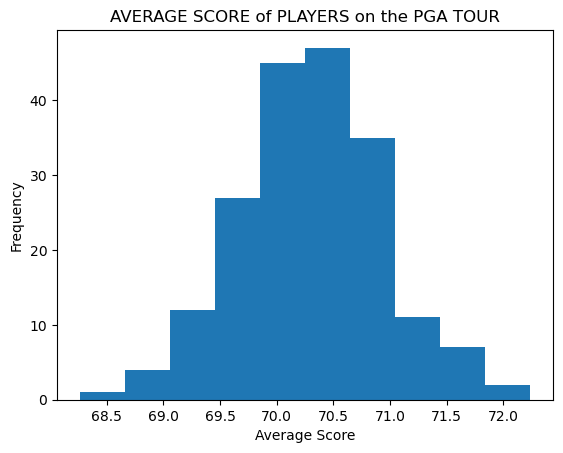

In [9]:
# Average Score follows a Normal Distribution
# Plot Average Score data from pgatour_golfstats_2022-2023_averagescore.csv
AVG = df.AVG
#plt.hist(AVG)
#plt.show()

# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(AVG) 
  
# Set title 
ax.set_title("AVERAGE SCORE of PLAYERS on the PGA TOUR") 
  
# adding labels 
ax.set_xlabel('Average Score') 
ax.set_ylabel('Frequency') 

plt.show()

#### Mean
As you can see, the histogram above fits classic the bell curve shape of the normal distribution with most of the values centered around the mean of 70.30324607329841.

In [10]:
mean = df.AVG.mean()
mean

70.30324607329841

#### Standard Deviation
In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range. A standard deviation of 0.6373654137997954 is considered low. 

In [11]:
std = df.AVG.std()
std

0.6373654137997954

#### BEST-FIT FOR REAL-WORLD AVERAGE SCORE DATA

In [12]:
from scipy import stats
dist = stats.norm
data = AVG
bounds = [(68, 73), (0, 191)]
res = stats.fit(dist, data, bounds)
res

  params: FitParams(loc=70.30324604411653, scale=0.6356947211221634)
 success: True
 message: 'Optimization terminated successfully.'

In [13]:
res.params

FitParams(loc=70.30324604411653, scale=0.6356947211221634)

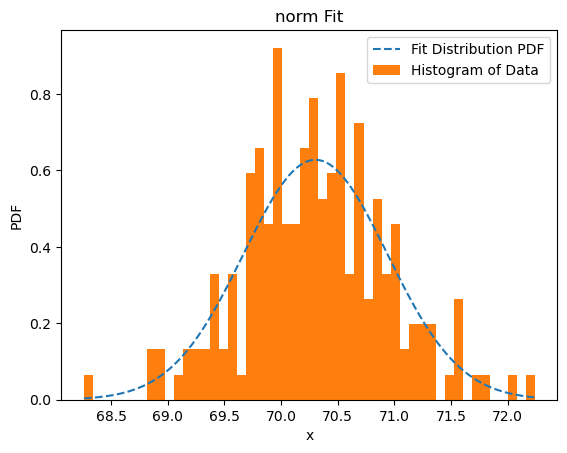

In [14]:
res.plot()
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


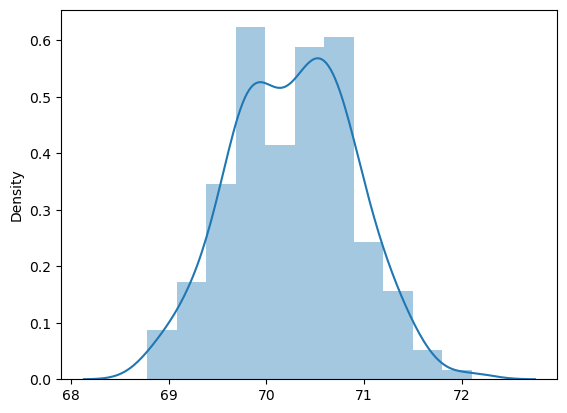

In [15]:
import seaborn as sns
from scipy.stats import norm

data = norm.rvs(70.30324607329841,0.6373654137997954,size=191) # you can use a pandas series or a list if you want

sns.distplot(data)
plt.show()

## RANK is uniformly distributed (not exactly uniform though)
In probability theory and statistics, the discrete uniform distribution is a symmetric probability distribution wherein a finite number of values are equally likely to be observed; every one of n values has equal probability 1/n. Another way of saying "discrete uniform distribution" would be "a known, finite number of outcomes equally likely to happen".

RANK is approximately uniformly distributed but not exactly uniform because there are a small few players who are tied. 
For example, Viktor Hovland and Rory McIlroy are both ranked 4th. Both players have the same Average Score (68.92). And nobody is ranked 5th. The next rank after 4th is 6th. As a result, the distribution is not exactly uniform.  

In [16]:
RANK = df.RANK
RANK

0        1
1        2
2        3
3        4
4        4
      ... 
186    187
187    188
188    189
189    190
190    191
Name: RANK, Length: 191, dtype: int64

In [17]:
x, counts = np.unique(RANK, return_counts=True)
x, counts

(array([  1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  13,  14,  16,
         17,  18,  19,  20,  22,  23,  25,  26,  27,  30,  32,  34,  35,
         37,  39,  41,  43,  44,  45,  46,  47,  49,  52,  55,  57,  59,
         60,  63,  64,  66,  67,  70,  72,  73,  74,  78,  80,  81,  85,
         86,  87,  90,  91,  92,  93,  95,  98, 100, 102, 104, 105, 106,
        107, 109, 110, 112, 113, 116, 117, 118, 119, 123, 125, 126, 127,
        128, 130, 131, 132, 133, 134, 135, 136, 137, 139, 141, 143, 145,
        146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 160,
        162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 174, 175, 176,
        177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190,
        191], dtype=int64),
 array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3,
        2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 3, 2, 2, 1, 3, 1, 2, 1, 3,
        2, 1, 1, 4, 2, 1, 4, 1, 1, 3, 1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 1, 2,
        1, 2, 1, 3, 

In [18]:
RANK = np.array(RANK)

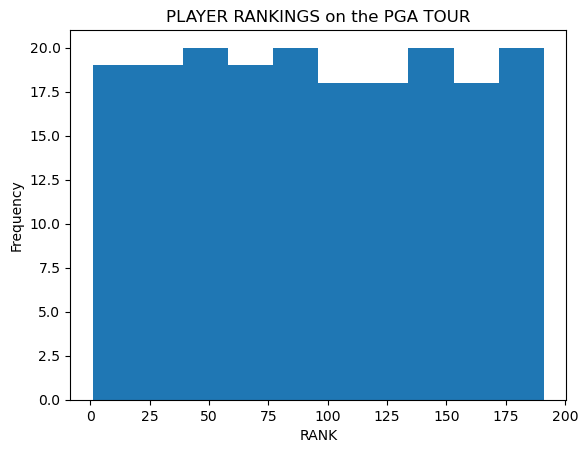

In [19]:
# RANK is uniformly distributed
#plt.hist(RANK)
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(RANK) 
  
# Set title 
ax.set_title("PLAYER RANKINGS on the PGA TOUR") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Frequency') 

plt.show()

#  SYNTHESIZE / SIMULATE A DATA SET

In [20]:
low = 1
high = len(df.index)+1
size = 1
syn_rank = np.arange(low,high,size)
syn_rank

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [21]:
x, counts = np.unique(syn_rank, return_counts=True)
x, counts

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

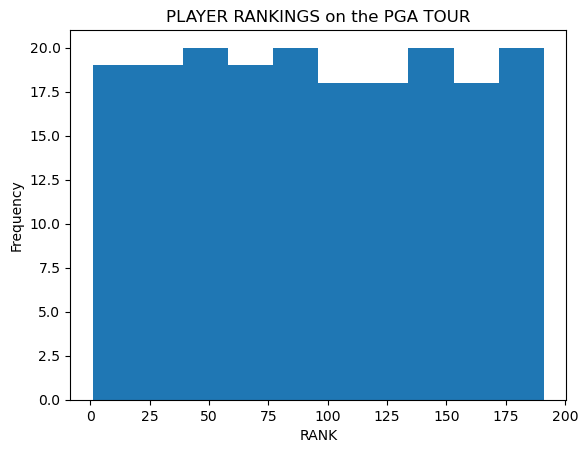

In [22]:
fig, ax = plt.subplots(1, 1) 
ax.hist(RANK) 
  
# Set title 
ax.set_title("PLAYER RANKINGS on the PGA TOUR") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Frequency')
#plt.hist(syn_rank)
plt.show()

In [23]:
# Range of values for RANK.
low = 1
high = len(df.index)+1
size = 1000000
syn_rank = np.linspace(low,high,size)
syn_rank

array([  1.      ,   1.000191,   1.000382, ..., 191.999618, 191.999809,
       192.      ])

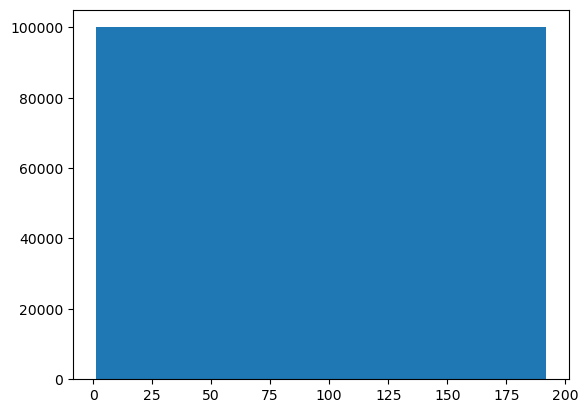

In [24]:
plt.hist(syn_rank)
plt.show()

### SYNTHESIZING DATA FOR RANK COLUMN
There are 2 similiar ways to do this using RANDOM NUMBER GENERATOR and np.random.randint. We could also use np.arange or numpy.linspace to generate a perfectly uniform distribution. But I decided not to do this for 2 reason:
- the assignment specifically says to use numpy.random
- the real world data isn't perfectly uniform

#### RANDOM NUMBER GENERATOR for INTEGERS

In [25]:
low = 1
high = 191
size = 191

In [26]:
rng = np.random.default_rng()
rand_ints = rng.integers(low=low, high=high+1, size=size)
rand_ints

array([ 72,  64, 113, 154,  55,  16, 157,  62, 137, 166,  94,  41, 188,
       118,  30,  34, 176, 149, 140,  65, 134,  10,  86,  11, 166,  46,
         1, 138, 116, 134,  83, 141, 135, 138, 141,  92, 167,  70, 140,
        12,  31, 106,   9, 162, 172,  34,  47,  18,  81, 176,  35, 111,
       128,  65,  73, 101, 143,  69, 143, 175,  87, 158, 151,  77,  42,
       140, 145, 127, 141, 186,  11,  72, 125,  89, 132, 143,  23, 191,
        29, 140,  33, 149,  47, 141, 160, 178,  56,  63,  85, 180, 124,
        90, 102,  30,  94,  84, 121, 102,  54,  42, 102, 153,  39,  34,
       131,  34, 152,  52,  67,  66,  67, 149, 116, 124, 122,  80,  70,
       177, 151, 174, 150, 186, 128, 149,  13,  45,  64,   1, 182, 156,
       191, 181,  96,  61, 178,  61,  28, 119,  90,  98, 113,  14, 155,
        51, 173, 123, 159, 105,  47, 161, 164, 191,  14, 121, 126, 123,
       118, 119, 104,  30,  22,   4,  17,  78, 178, 108,  59, 182,  56,
       126,  83,  87, 102,  29,  46,  43,  42, 129, 110, 100,  4

In [27]:
# rng.integers is a very good way to model the RANK variable because most of the values are unique. 
#A small number of values are repeated though which is what we see the the real-world data from the PGA TOUR.

x, counts = np.unique(rand_ints, return_counts=True)
x, counts

(array([  1,   4,   9,  10,  11,  12,  13,  14,  16,  17,  18,  22,  23,
         28,  29,  30,  31,  33,  34,  35,  39,  41,  42,  43,  44,  45,
         46,  47,  51,  52,  54,  55,  56,  59,  61,  62,  63,  64,  65,
         66,  67,  69,  70,  72,  73,  77,  78,  80,  81,  83,  84,  85,
         86,  87,  89,  90,  92,  94,  95,  96,  98, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 110, 111, 113, 116, 118, 119, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 131, 132, 134, 135, 137, 138,
        140, 141, 143, 145, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 164, 166, 167, 172, 173, 174, 175, 176,
        177, 178, 180, 181, 182, 186, 188, 189, 191], dtype=int64),
 array([2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 4, 1, 1, 1,
        3, 1, 1, 1, 2, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 2,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 

In [28]:
syn_rank = np.sort(rand_ints)
syn_rank

array([  1,   1,   4,   9,  10,  11,  11,  12,  13,  14,  14,  16,  17,
        18,  22,  23,  23,  28,  29,  29,  30,  30,  30,  31,  33,  34,
        34,  34,  34,  35,  39,  41,  42,  42,  42,  43,  44,  45,  46,
        46,  47,  47,  47,  51,  51,  52,  54,  55,  56,  56,  59,  61,
        61,  62,  63,  64,  64,  65,  65,  66,  67,  67,  69,  70,  70,
        70,  72,  72,  73,  77,  78,  80,  81,  83,  83,  84,  85,  86,
        87,  87,  89,  90,  90,  92,  94,  94,  95,  96,  98, 100, 101,
       102, 102, 102, 102, 103, 104, 105, 106, 107, 108, 110, 111, 113,
       113, 116, 116, 116, 118, 118, 119, 119, 121, 121, 122, 123, 123,
       124, 124, 125, 126, 126, 127, 128, 128, 129, 131, 132, 134, 134,
       135, 137, 138, 138, 140, 140, 140, 140, 141, 141, 141, 141, 143,
       143, 143, 145, 149, 149, 149, 149, 150, 151, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 164, 164, 166, 166, 167,
       172, 173, 173, 174, 175, 176, 176, 177, 178, 178, 178, 18

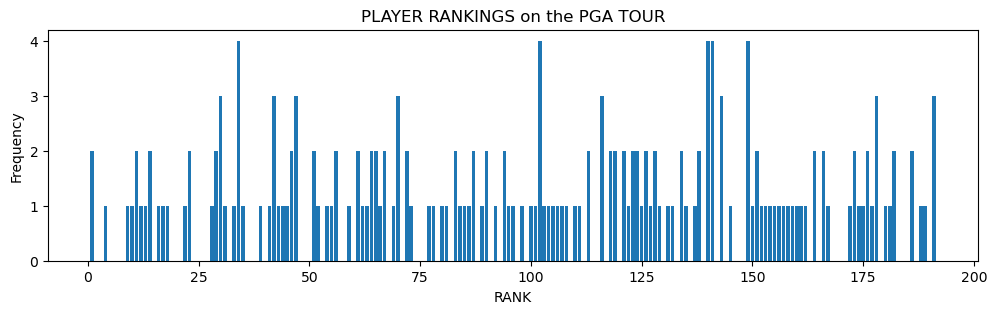

In [29]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12, 3))

# Set title 
ax.set_title("PLAYER RANKINGS on the PGA TOUR") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Frequency')

# Plot a bar chart.
ax.bar(x, counts);

As you can see, this is a pretty good approximation of a uniform distribution.
There is roughly the same number in each bin of the histogram.
There is some variation though because the sample size is small(191). 
If we increased the sample size, the distribution would be more uniform. 
But I can't do that because there are only 191 players on the PGA TOUR.

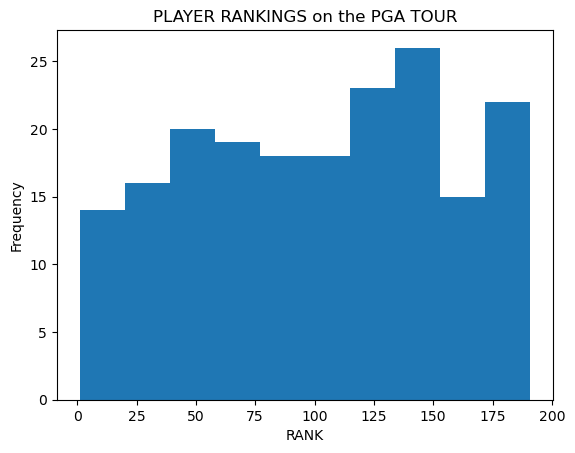

In [30]:
# As you can see, this is a pretty good approximation of a uniform distribution.
# There is roughly the same number in each bin of the histogram.
#There is some variation though because the sample size is small(191). 
#If we increased the sample size, the distribution would be more uniform. 
# But I can't do that because there are only 191 players on the PGA TOUR.

#n, bins, patches = plt.hist(rand_ints)

fig, ax = plt.subplots(1, 1) 
n, bins, patches = ax.hist(rand_ints) 
  
# Set title 
ax.set_title("PLAYER RANKINGS on the PGA TOUR") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Frequency')

plt.show()

#### HISTOGRAM BINS
By default, there are 10 bins. Refer to the numpy.histogram API.
- In the first bin there are 23 values. 
- In the second bin there are 23 values as well.
- 17 in the 3rd bin,
- 15 in the next bin, 
- 21 in the next bin, 
- 18 in the next bin, 
- 16 in the next bin, 
- 19 in the next bin, 
- 16 in the next bin, 
- 23 in the last bin

In [31]:
n, bins

(array([14., 16., 20., 19., 18., 18., 23., 26., 15., 22.]),
 array([  1.,  20.,  39.,  58.,  77.,  96., 115., 134., 153., 172., 191.]))

#### NUMPY RANDOM INTEGERS - np.random.randint

In [32]:
np.random.randint(1,191)

32

In [33]:
R = [np.random.randint(1,191) for i in range(191)]
R

[135,
 106,
 147,
 17,
 103,
 29,
 72,
 154,
 140,
 53,
 56,
 157,
 72,
 104,
 184,
 43,
 141,
 55,
 189,
 142,
 145,
 64,
 173,
 71,
 76,
 134,
 159,
 22,
 97,
 62,
 136,
 68,
 183,
 11,
 46,
 13,
 41,
 93,
 15,
 168,
 169,
 154,
 147,
 168,
 85,
 175,
 86,
 118,
 56,
 29,
 119,
 144,
 122,
 3,
 145,
 126,
 182,
 179,
 10,
 5,
 39,
 116,
 12,
 40,
 12,
 148,
 60,
 94,
 62,
 70,
 116,
 82,
 54,
 47,
 15,
 102,
 100,
 177,
 84,
 84,
 37,
 96,
 176,
 190,
 79,
 9,
 138,
 151,
 148,
 86,
 23,
 170,
 40,
 122,
 155,
 67,
 190,
 42,
 34,
 117,
 1,
 138,
 117,
 126,
 117,
 88,
 60,
 128,
 71,
 69,
 118,
 155,
 138,
 176,
 178,
 103,
 162,
 17,
 69,
 170,
 34,
 14,
 122,
 51,
 18,
 14,
 42,
 51,
 95,
 95,
 8,
 184,
 141,
 95,
 68,
 101,
 72,
 57,
 89,
 78,
 14,
 16,
 188,
 74,
 28,
 187,
 16,
 94,
 176,
 78,
 39,
 41,
 137,
 138,
 108,
 151,
 68,
 140,
 4,
 35,
 190,
 138,
 62,
 88,
 44,
 166,
 80,
 89,
 150,
 20,
 91,
 45,
 145,
 33,
 146,
 10,
 55,
 176,
 19,
 181,
 174,
 170,
 89,
 89,
 78

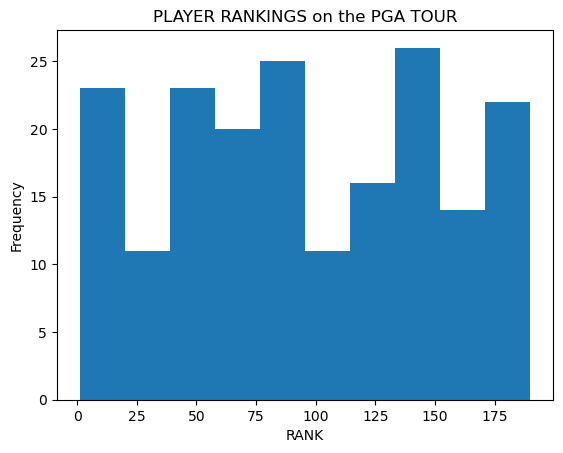

In [34]:
#plt.hist(R)
fig, ax = plt.subplots(1, 1) 
n, bins, patches = ax.hist(R) 
  
# Set title 
ax.set_title("PLAYER RANKINGS on the PGA TOUR") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Frequency')
plt.show()

In [35]:
size = len(df.index)
size

191

### Synthesize a random normal distribution for Average Score

In [36]:
# Synthesize a random normal distribution for Average Score
syn_avg = np.random.normal(mean,std,size)
syn_avg

array([70.76462041, 70.55845748, 70.81025703, 70.84428242, 70.30129418,
       70.86221838, 69.04814111, 69.73112917, 70.7841248 , 70.94553026,
       70.25177894, 70.38397455, 68.51084097, 71.13148109, 70.64825488,
       71.15606727, 70.55565201, 69.78895588, 70.16336199, 71.14272308,
       70.32908579, 70.53728375, 70.22490722, 69.97886981, 70.2702901 ,
       70.08648352, 70.97906041, 70.18090139, 69.87545287, 70.23090981,
       71.02300445, 69.92552609, 70.42379892, 70.23307023, 70.51224732,
       70.34498747, 70.65878664, 70.2209966 , 70.45471401, 72.36328574,
       71.29592425, 70.6812948 , 69.72447509, 70.95109638, 69.89644662,
       70.39739537, 70.23010513, 71.05512348, 71.04884643, 69.93670887,
       69.30669876, 70.86212591, 70.07162007, 71.14472108, 69.42256278,
       70.61459572, 70.27008934, 69.65469829, 70.09293173, 70.63395358,
       71.67152147, 69.20775849, 70.3707819 , 71.69529169, 70.73103444,
       70.8996206 , 70.63070034, 70.21542032, 70.07196095, 70.63

In [37]:
# I need to sort this array because in the ral world data, this column is sorted in ascending order.
# The reason for this is in golf the best player has the lowest score. 
# And the worst player has the highest score.
sort_avg = np.sort(syn_avg)
sort_avg

array([68.4353007 , 68.51084097, 68.80553563, 69.04814111, 69.15792664,
       69.20775849, 69.30669876, 69.33994985, 69.4004459 , 69.42256278,
       69.42554633, 69.51369984, 69.55736887, 69.56028031, 69.58516943,
       69.58530024, 69.60285684, 69.62226567, 69.63012519, 69.63208152,
       69.65469829, 69.65878436, 69.66869468, 69.69688873, 69.71023437,
       69.72447509, 69.72469367, 69.72484643, 69.73112917, 69.73649202,
       69.78895588, 69.79022312, 69.80427802, 69.82225267, 69.84004688,
       69.87168566, 69.87545287, 69.88873991, 69.89122095, 69.89644662,
       69.90658921, 69.92552609, 69.93670887, 69.96864693, 69.97886981,
       69.98884031, 69.99289307, 70.03105597, 70.0394872 , 70.0415056 ,
       70.07112167, 70.07162007, 70.07196095, 70.07811442, 70.08088982,
       70.08648352, 70.08679279, 70.09293173, 70.09411058, 70.10737182,
       70.11308295, 70.1206933 , 70.14786799, 70.15847458, 70.15889128,
       70.16336199, 70.17228898, 70.18090139, 70.1884996 , 70.21

### Synthesize a poisson distribution for Average Score

In [38]:
# Synthesize a poisson distribution for Average Score
p = np.random.default_rng().poisson(mean, 191)
p

array([69, 68, 77, 75, 63, 72, 86, 58, 88, 58, 64, 82, 70, 70, 84, 61, 62,
       75, 58, 72, 72, 69, 68, 80, 73, 72, 81, 61, 63, 68, 59, 68, 67, 78,
       68, 69, 71, 65, 80, 74, 57, 74, 72, 56, 67, 76, 64, 63, 74, 64, 62,
       83, 58, 78, 67, 68, 61, 67, 81, 70, 70, 84, 73, 57, 81, 68, 68, 77,
       68, 80, 79, 88, 81, 73, 75, 70, 70, 78, 69, 73, 65, 65, 69, 65, 78,
       75, 65, 71, 77, 84, 65, 79, 80, 75, 72, 58, 58, 64, 71, 71, 63, 76,
       76, 95, 54, 99, 72, 84, 77, 80, 79, 61, 79, 58, 61, 72, 84, 68, 65,
       68, 62, 86, 69, 67, 81, 57, 78, 77, 67, 59, 74, 93, 63, 71, 76, 68,
       86, 74, 70, 70, 73, 79, 67, 73, 58, 76, 65, 75, 48, 51, 69, 65, 67,
       83, 68, 72, 75, 68, 75, 67, 70, 50, 64, 61, 62, 64, 61, 74, 68, 69,
       62, 61, 81, 71, 71, 65, 62, 69, 70, 54, 85, 74, 78, 72, 83, 84, 91,
       66, 75, 71, 78], dtype=int64)

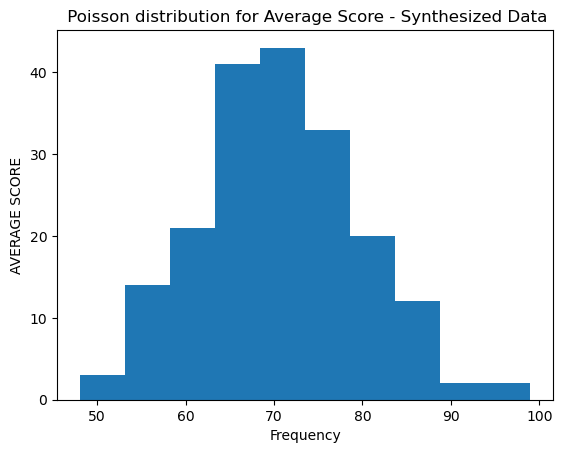

In [39]:
# Plot poisson distribution for Average Score
#plt.hist(p)
fig, ax = plt.subplots(1, 1) 
ax.hist(p)
  
# Set title 
ax.set_title(" Poisson distribution for Average Score - Synthesized Data") 
  
# adding labels 
ax.set_xlabel('Frequency') 
ax.set_ylabel('AVERAGE SCORE')
plt.show()

In [40]:
df = df.rename(columns={'AVG': 'SCORE','TOTAL STROKES': 'STROKES', 'TOTAL ROUNDS': 'ROUNDS'})
df

,RANK,PLAYER,SCORE,STROKES,ROUNDS,TOUR
0,1,Scottie Scheffler,68.26,6007,88,PGA TOUR
1,2,Jon Rahm,68.82,4886,71,PGA TOUR
2,3,Patrick Cantlay,68.83,4956,72,PGA TOUR
3,4,Viktor Hovland,68.92,6065,88,PGA TOUR
4,4,Rory McIlroy,68.92,4411,64,PGA TOUR
...,...,...,...,...,...,...
186,187,Max McGreevy,71.60,6444,90,PGA TOUR
187,188,Michael Gligic,71.72,5092,71,PGA TOUR
188,189,Dylan Frittelli,71.84,5460,76,PGA TOUR
189,190,Nick Watney,72.08,5334,74,PGA TOUR


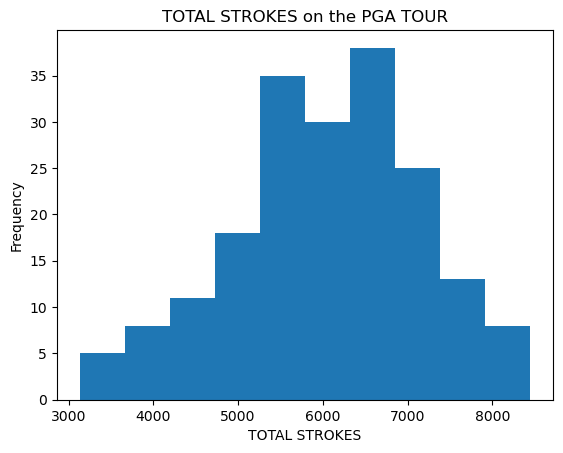

In [41]:
# Total Strokes follows a Normal Distribution
# Plot Total Strokes data from pgatour_golfstats_2022-2023_averagescore.csv
STROKES = df.STROKES
#plt.hist(STROKES)
fig, ax = plt.subplots(1, 1) 
ax.hist(STROKES) 
  
# Set title 
ax.set_title("TOTAL STROKES on the PGA TOUR") 
  
# adding labels 
ax.set_xlabel('TOTAL STROKES') 
ax.set_ylabel('Frequency')
plt.show()

In [42]:
mean_strokes = df.STROKES.mean()
mean_strokes

6058.560209424084

In [43]:
std_strokes = df.STROKES.std()
std_strokes

1134.2457615841176

In [44]:
# Synthesize a random normal distribution for STROKES
norm_strokes = np.random.normal(mean_strokes,std_strokes,size)
norm_strokes

array([4318.87412479, 6532.82280176, 6036.21321536, 6493.61584207,
       6631.74506481, 7270.0955539 , 5449.13394468, 6724.93317707,
       5497.46839817, 4767.6519455 , 6717.75088101, 5904.08493652,
       5858.26506625, 5762.80411471, 7567.36382261, 4257.55475028,
       7699.93379317, 5248.50936025, 4177.09771512, 6990.5140758 ,
       6407.75803412, 4917.92139722, 6133.64597019, 4911.93103641,
       6332.49450284, 6234.32036621, 5730.80848586, 6907.74499087,
       6710.45485748, 6381.18031898, 6652.12764089, 7355.33608342,
       6340.98510327, 7562.47246322, 7431.08220173, 4973.2003998 ,
       7310.12652966, 5918.27900229, 6902.61817265, 4540.98742776,
       7005.31864177, 6641.04419778, 5578.67542148, 4564.365539  ,
       7171.75425944, 6554.83827845, 6490.78644497, 5977.65831428,
       4906.90159769, 5547.02024269, 5060.58598043, 4956.16047616,
       7304.81087781, 6419.69327802, 5793.96362746, 8535.00912754,
       4701.7072487 , 7264.24466256, 6847.16591786, 7094.85191

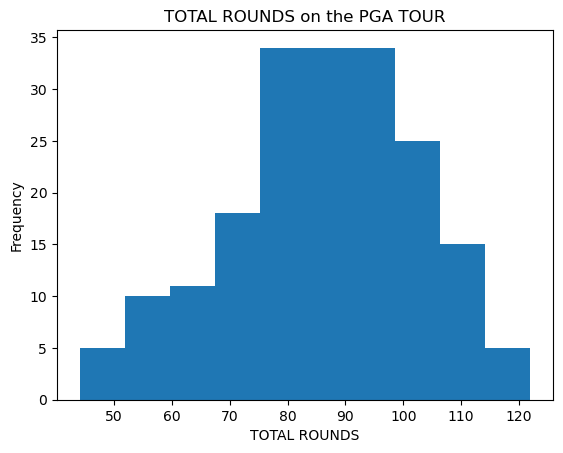

In [45]:
# ROUNDS follows a Normal Distribution
# Plot ROUNDS data from pgatour_golfstats_2022-2023_averagescore.csv
ROUNDS = df.ROUNDS
#plt.hist(ROUNDS)
fig, ax = plt.subplots(1, 1) 
ax.hist(ROUNDS) 
  
# Set title 
ax.set_title("TOTAL ROUNDS on the PGA TOUR") 
  
# adding labels 
ax.set_xlabel('TOTAL ROUNDS') 
ax.set_ylabel('Frequency')
plt.show()

In [46]:
mean_rounds = df.ROUNDS.mean()
mean_rounds

86.22513089005236

In [47]:
std_rounds = df.ROUNDS.std()
std_rounds

16.359018013851397

### BEST-FIT FOR REAL-WORLD ROUNDS DATA

In [48]:
#BEST-FIT FOR REAL ROUNDS DATA
from scipy import stats
dist = stats.norm
data = ROUNDS
res = stats.fit(dist, data,bounds=[(69,73), (0, 191)])
res

  params: FitParams(loc=73.0, scale=21.002884584493692)
 success: True
 message: 'Optimization terminated successfully.'

In [49]:
res.params

FitParams(loc=73.0, scale=21.002884584493692)

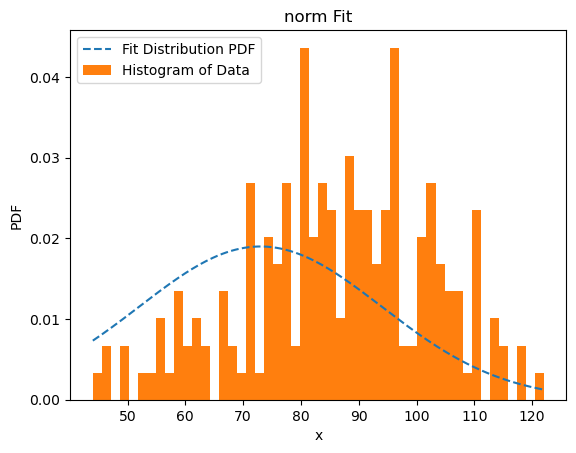

In [50]:
res.plot()
plt.show()

In [51]:
# Synthesize a random normal distribution for ROUNDS
norm_rounds = np.random.normal(mean_rounds,std_rounds,size)
norm_rounds

array([ 87.830927  ,  78.71191138,  85.65764464,  90.25104849,
       103.84437741, 103.56449055,  87.83789772,  83.07531431,
        83.33404755,  74.56635949,  82.71078645,  67.93981442,
        76.1195718 ,  73.13002248,  96.92644055,  85.40716041,
        87.57078511,  93.1681347 ,  81.64460898, 103.36560274,
        78.35346342,  74.09156943, 102.51070798, 112.77490212,
        69.48073184,  81.84716464,  97.44562536, 108.47500265,
       105.59528927,  81.23509199,  72.49755309,  77.14740218,
        77.35416456,  68.06227871, 104.88054083,  81.28032248,
        89.64592038,  83.64987282,  87.76965233, 121.72159982,
        93.82900997, 106.40074936,  94.77817243,  83.03774282,
        86.39006335,  95.68725383,  75.248898  ,  85.35745539,
        79.96832495,  83.93069597, 106.27451508, 106.62328187,
        55.05277604, 110.96310645, 112.93838326, 108.52501857,
        68.1738404 ,  89.30478677,  48.96695371,  84.3904351 ,
        85.86641932,  64.14594473, 109.02505171,  84.12

### BEST-FIT FOR SYNTHESIZED ROUNDS DATA

In [52]:
from scipy import stats
dist = stats.norm
data = norm_rounds
res = stats.fit(dist, data,bounds=[(69,73), (0, 191)])
res

  params: FitParams(loc=73.0, scale=20.171948973923364)
 success: True
 message: 'Optimization terminated successfully.'

In [53]:
res.params

FitParams(loc=73.0, scale=20.171948973923364)

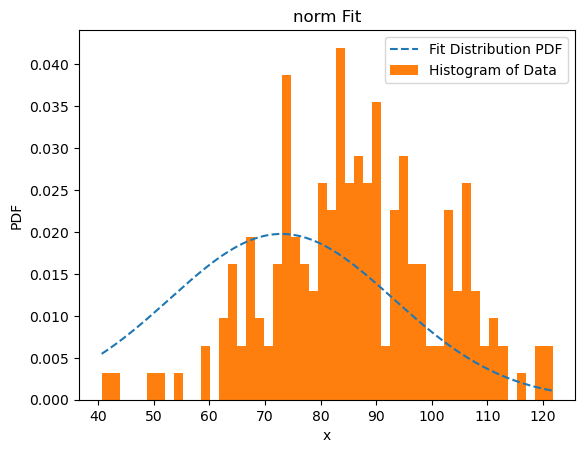

In [54]:
res.plot()
plt.show()

##  DATA FRAME OF SYNTHESIZED DATA

In [55]:
syn_df = pd.DataFrame(dict(RANK=np.arange(1,192,1),
                       AVERAGE=np.random.normal(mean,std,size), STROKES=np.random.normal(mean_strokes,std_strokes,size), ROUNDS = np.random.normal(mean_rounds,std_rounds,size)),
                  columns=['RANK', 'AVERAGE', 'STROKES', 'ROUNDS'])
syn_df

,RANK,AVERAGE,STROKES,ROUNDS
0,1,70.007616,5096.460071,84.885229
1,2,69.434010,6973.411095,111.586510
2,3,70.201063,4913.359814,89.367466
3,4,69.859488,4609.047385,101.026621
4,5,70.872206,6786.062874,81.024168
...,...,...,...,...
186,187,70.180281,7263.723443,118.373175
187,188,70.440768,7978.117229,67.129283
188,189,70.455621,4331.555465,108.348587
189,190,70.589011,5283.641026,63.507200


In [56]:
#norm_avg = np.random.normal(mean,std,size)
#syn_df = pd.DataFrame(dict(RANK=np.arange(1,192,1),
#                       AVERAGE=np.random.normal(mean,std,size), STROKES=np.random.normal(mean_strokes,std_strokes,size), ROUNDS = np.random.normal(mean_rounds,std_rounds,size)),
#                  columns=['RANK', 'AVERAGE', 'STROKES', 'ROUNDS'])
my_dict = {'RANK' : syn_rank, 'AVERAGE' : sort_avg, 'STROKES' : norm_strokes, 'ROUNDS' : norm_rounds}
syn_df = pd.DataFrame(my_dict)
syn_df

,RANK,AVERAGE,STROKES,ROUNDS
0,1,68.435301,4318.874125,87.830927
1,1,68.510841,6532.822802,78.711911
2,4,68.805536,6036.213215,85.657645
3,9,69.048141,6493.615842,90.251048
4,10,69.157927,6631.745065,103.844377
...,...,...,...,...
186,188,71.671521,5144.351026,76.151875
187,189,71.695292,6523.486120,69.539751
188,191,71.758873,8421.644387,77.229107
189,191,72.363286,5601.093685,83.334030


## DATA TYPES

In [57]:
syn_df.dtypes

RANK         int64
AVERAGE    float64
STROKES    float64
ROUNDS     float64
dtype: object

In [58]:
#https://stackoverflow.com/questions/66969078/set-decimal-precision-of-a-pandas-dataframe-column-with-a-datatype-of-decimal
syn_df.AVERAGE = syn_df.AVERAGE.round(2)
syn_df.AVERAGE

0      68.44
1      68.51
2      68.81
3      69.05
4      69.16
       ...  
186    71.67
187    71.70
188    71.76
189    72.36
190    72.42
Name: AVERAGE, Length: 191, dtype: float64

**Integers**

$\mathbb{Z} = \{ \ldots, -3, -2, -1, 0, 1, 2, 3, \ldots \}$

**Naturals**

$\mathbb{N} = \{1, 2, 3, \ldots\}$

$\mathbb{N}_0 = \{0, 1, 2, 3, \ldots\}$

**Reals**

$ \mathbb{R} $

![Real Number Line](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Real_number_line.svg/689px-Real_number_line.svg.png)

In [59]:
syn_df.STROKES = syn_df.STROKES.astype(int)
syn_df.ROUNDS = syn_df.ROUNDS.astype(int)
syn_df

,RANK,AVERAGE,STROKES,ROUNDS
0,1,68.44,4318,87
1,1,68.51,6532,78
2,4,68.81,6036,85
3,9,69.05,6493,90
4,10,69.16,6631,103
...,...,...,...,...
186,188,71.67,5144,76
187,189,71.70,6523,69
188,191,71.76,8421,77
189,191,72.36,5601,83


In [60]:
syn_df["TOUR"] = "PGA TOUR"
syn_df

,RANK,AVERAGE,STROKES,ROUNDS,TOUR
0,1,68.44,4318,87,PGA TOUR
1,1,68.51,6532,78,PGA TOUR
2,4,68.81,6036,85,PGA TOUR
3,9,69.05,6493,90,PGA TOUR
4,10,69.16,6631,103,PGA TOUR
...,...,...,...,...,...
186,188,71.67,5144,76,PGA TOUR
187,189,71.70,6523,69,PGA TOUR
188,191,71.76,8421,77,PGA TOUR
189,191,72.36,5601,83,PGA TOUR


#  CORRELATION and LINEAR REGRESSION

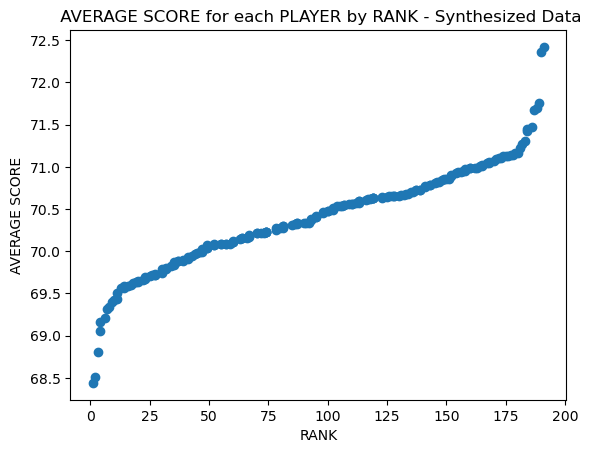

In [61]:
#plt.scatter(RANK,AVG)
fig, ax = plt.subplots(1, 1) 
ax.scatter(RANK, syn_df.AVERAGE) 
  
# Set title 
ax.set_title(" AVERAGE SCORE for each PLAYER by RANK - Synthesized Data") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('AVERAGE SCORE')
plt.show()

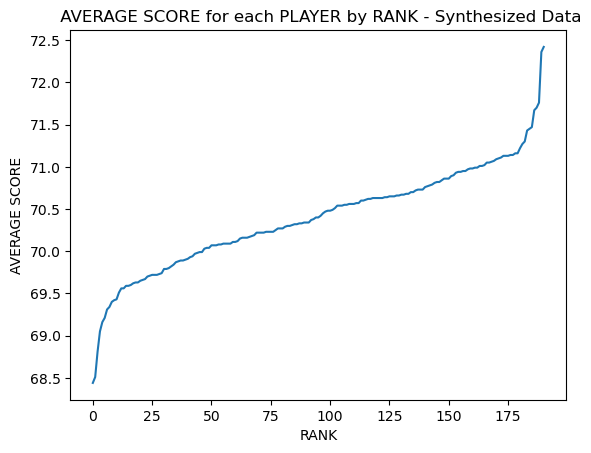

In [62]:
#plt.plot(syn_df.AVERAGE)
fig, ax = plt.subplots(1, 1) 
ax.plot(syn_df.AVERAGE) 
  
# Set title 
ax.set_title(" AVERAGE SCORE for each PLAYER by RANK - Synthesized Data") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('AVERAGE SCORE')
plt.show()

In [63]:
RANK = np.array(RANK)
RANK

array([  1,   2,   3,   4,   4,   6,   7,   8,   9,  10,  11,  11,  13,
        14,  14,  16,  17,  18,  19,  20,  20,  22,  23,  23,  25,  26,
        27,  27,  27,  30,  30,  32,  32,  34,  35,  35,  37,  37,  39,
        39,  41,  41,  43,  44,  45,  46,  47,  47,  49,  49,  49,  52,
        52,  52,  55,  55,  57,  57,  59,  60,  60,  60,  63,  64,  64,
        66,  67,  67,  67,  70,  70,  72,  73,  74,  74,  74,  74,  78,
        78,  80,  81,  81,  81,  81,  85,  86,  87,  87,  87,  90,  91,
        92,  93,  93,  95,  95,  95,  98,  98, 100, 100, 102, 102, 104,
       105, 106, 107, 107, 109, 110, 110, 112, 113, 113, 113, 116, 117,
       118, 119, 119, 119, 119, 123, 123, 125, 126, 127, 128, 128, 130,
       131, 132, 133, 134, 135, 136, 137, 137, 139, 139, 141, 141, 143,
       143, 145, 146, 147, 148, 149, 150, 151, 152, 152, 154, 155, 156,
       157, 158, 158, 160, 160, 162, 163, 164, 165, 165, 167, 168, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [64]:
AVG = np.array(AVG)
AVG

array([68.26, 68.82, 68.83, 68.92, 68.92, 69.07, 69.17, 69.2 , 69.23,
       69.26, 69.35, 69.35, 69.38, 69.4 , 69.4 , 69.44, 69.45, 69.46,
       69.52, 69.57, 69.57, 69.58, 69.6 , 69.6 , 69.64, 69.7 , 69.71,
       69.71, 69.71, 69.72, 69.72, 69.74, 69.74, 69.76, 69.8 , 69.8 ,
       69.81, 69.81, 69.82, 69.82, 69.83, 69.83, 69.84, 69.85, 69.86,
       69.87, 69.89, 69.89, 69.9 , 69.9 , 69.9 , 69.94, 69.94, 69.94,
       69.95, 69.95, 69.96, 69.96, 69.97, 69.98, 69.98, 69.98, 70.  ,
       70.01, 70.01, 70.04, 70.06, 70.06, 70.06, 70.07, 70.07, 70.08,
       70.12, 70.13, 70.13, 70.13, 70.13, 70.15, 70.15, 70.18, 70.19,
       70.19, 70.19, 70.19, 70.22, 70.23, 70.24, 70.24, 70.24, 70.25,
       70.26, 70.27, 70.29, 70.29, 70.3 , 70.3 , 70.3 , 70.31, 70.31,
       70.32, 70.32, 70.33, 70.33, 70.35, 70.36, 70.37, 70.38, 70.38,
       70.39, 70.41, 70.41, 70.42, 70.44, 70.44, 70.44, 70.46, 70.47,
       70.48, 70.49, 70.49, 70.49, 70.49, 70.5 , 70.5 , 70.51, 70.52,
       70.53, 70.54,

In [65]:
correlation = np.corrcoef(RANK, AVG)
correlation

array([[1.        , 0.96395719],
       [0.96395719, 1.        ]])

In [66]:
x = RANK.reshape(-1,1)
y = AVG.reshape(-1,1)

In [67]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [68]:
lr.predict([[5]])

array([[69.29801337]])

In [69]:
pred_y = lr.predict(x)
pred_y

array([[69.25363069],
       [69.26472636],
       [69.27582203],
       [69.2869177 ],
       [69.2869177 ],
       [69.30910904],
       [69.32020471],
       [69.33130037],
       [69.34239604],
       [69.35349171],
       [69.36458738],
       [69.36458738],
       [69.38677872],
       [69.39787438],
       [69.39787438],
       [69.42006572],
       [69.43116139],
       [69.44225706],
       [69.45335273],
       [69.4644484 ],
       [69.4644484 ],
       [69.48663973],
       [69.4977354 ],
       [69.4977354 ],
       [69.51992674],
       [69.53102241],
       [69.54211807],
       [69.54211807],
       [69.54211807],
       [69.57540508],
       [69.57540508],
       [69.59759642],
       [69.59759642],
       [69.61978775],
       [69.63088342],
       [69.63088342],
       [69.65307476],
       [69.65307476],
       [69.6752661 ],
       [69.6752661 ],
       [69.69745743],
       [69.69745743],
       [69.71964877],
       [69.73074444],
       [69.74184011],
       [69

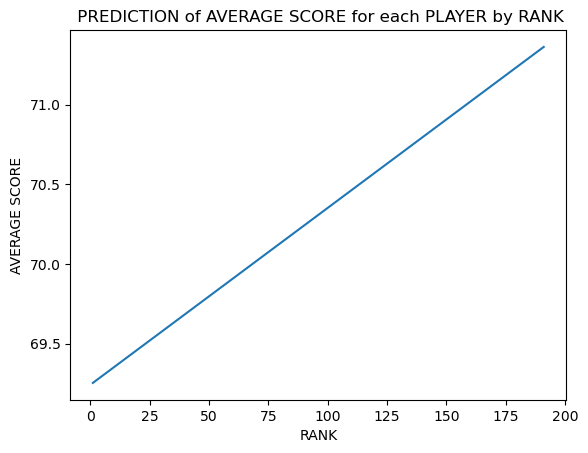

In [70]:
#plt.plot(x,pred_y )
fig, ax = plt.subplots(1, 1) 
ax.plot(x,pred_y) 
  
# Set title 
ax.set_title(" PREDICTION of AVERAGE SCORE for each PLAYER by RANK") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('AVERAGE SCORE')
plt.show()

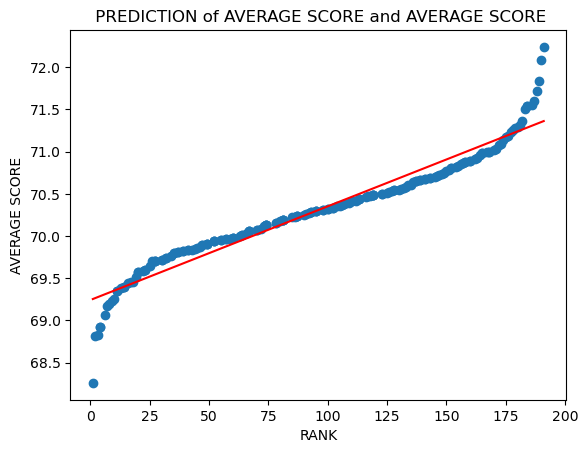

In [71]:
colour="red"
#plt.scatter(x,y)
#plt.plot(x,pred_y,colour )
fig, ax = plt.subplots(1, 1)
ax.scatter(x,y) 
ax.plot(x,pred_y,colour) 
  
# Set title 
ax.set_title(" PREDICTION of AVERAGE SCORE and AVERAGE SCORE") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('AVERAGE SCORE')
plt.show()

In [72]:
df.SCORE

0      68.26
1      68.82
2      68.83
3      68.92
4      68.92
       ...  
186    71.60
187    71.72
188    71.84
189    72.08
190    72.24
Name: SCORE, Length: 191, dtype: float64

In [73]:
df.describe()

,RANK,SCORE,STROKES,ROUNDS
count,191.000000,191.000000,191.000000,191.000000
mean,95.596859,70.303246,6058.560209,86.225131
std,55.372326,0.637365,1134.245762,16.359018
min,1.000000,68.260000,3128.000000,44.000000
25%,48.000000,69.895000,5386.500000,76.000000
50%,95.000000,70.300000,6085.000000,87.000000
75%,143.000000,70.690000,6840.500000,97.000000
max,191.000000,72.240000,8450.000000,122.000000


In [74]:
count = df.count()
count

RANK       191
PLAYER     191
SCORE      191
STROKES    191
ROUNDS     191
TOUR       191
dtype: int64

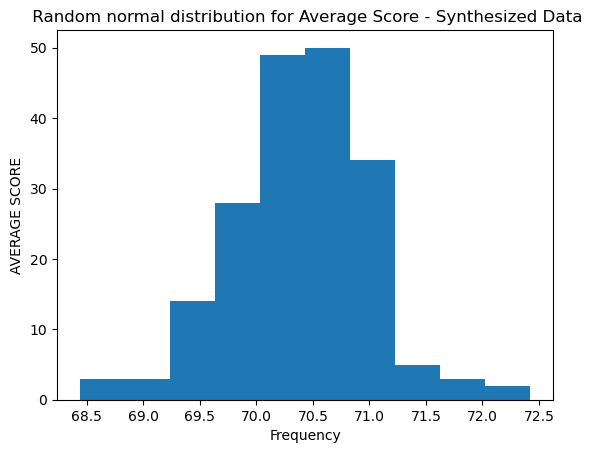

In [75]:
# Plot random normal distribution for Average Score
#plt.hist(y)
fig, ax = plt.subplots(1, 1) 
ax.hist(syn_avg)
  
# Set title 
ax.set_title(" Random normal distribution for Average Score - Synthesized Data") 
  
# adding labels 
ax.set_xlabel('Frequency') 
ax.set_ylabel('AVERAGE SCORE')
plt.show()

### BEST-FIT FOR SYNTHESIZED AVERAGE SCORE DATA

In [76]:
from scipy import stats
dist = stats.norm
data = syn_avg
res = stats.fit(dist, data,bounds=[(69,73), (0, 191)])
res

C:\Users\Fujitsu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: overflow encountered in true_divide
  x = asarray((x-loc) / scale)


  params: FitParams(loc=70.38447485439485, scale=0.6188294141082338)
 success: True
 message: 'Optimization terminated successfully.'

In [77]:
res.params

FitParams(loc=70.38447485439485, scale=0.6188294141082338)

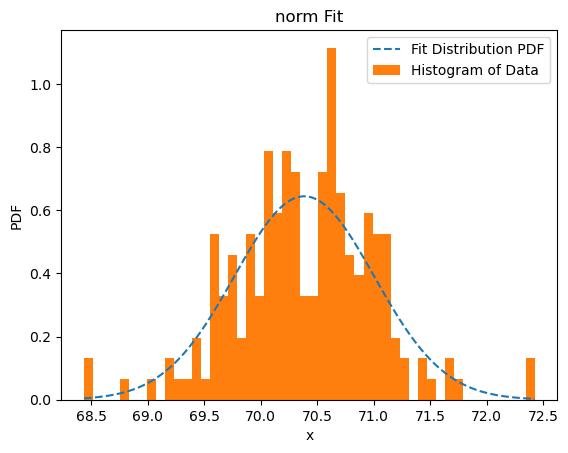

In [78]:
res.plot()
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


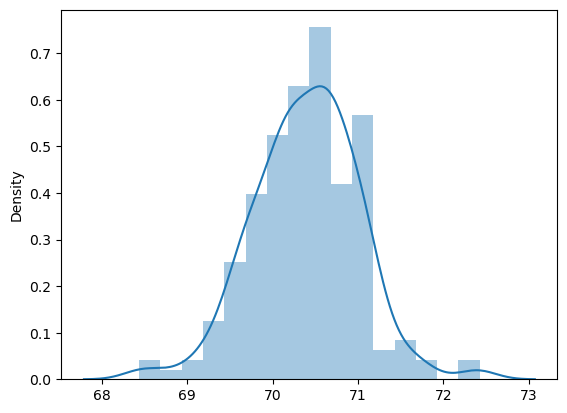

In [79]:
data = syn_avg
sns.distplot(data)
plt.show()

In [80]:
#ks.test(df, "pnorm", mean=mean, sd=std)

In [81]:
#fitdist(y, "norm")

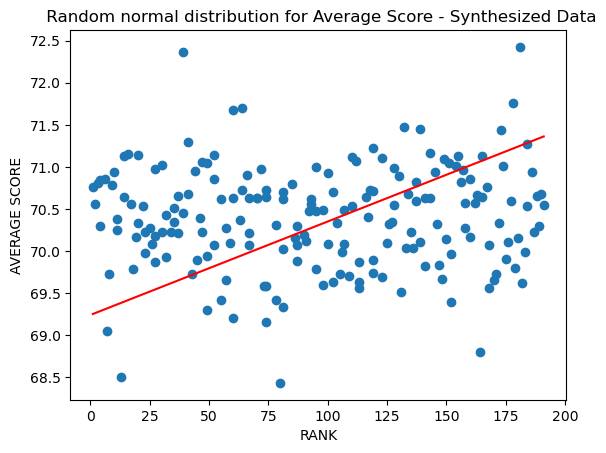

In [82]:
x = df.RANK
fig, ax = plt.subplots(1, 1) 
ax.scatter(x, syn_avg)
ax.plot(x,pred_y,colour)
  
# Set title 
ax.set_title(" Random normal distribution for Average Score - Synthesized Data") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('AVERAGE SCORE')
#plt.scatter(x,syn_avg)
plt.show()

In [83]:
arr_syn_avg = np.array(syn_avg)
arr_syn_avg

array([70.76462041, 70.55845748, 70.81025703, 70.84428242, 70.30129418,
       70.86221838, 69.04814111, 69.73112917, 70.7841248 , 70.94553026,
       70.25177894, 70.38397455, 68.51084097, 71.13148109, 70.64825488,
       71.15606727, 70.55565201, 69.78895588, 70.16336199, 71.14272308,
       70.32908579, 70.53728375, 70.22490722, 69.97886981, 70.2702901 ,
       70.08648352, 70.97906041, 70.18090139, 69.87545287, 70.23090981,
       71.02300445, 69.92552609, 70.42379892, 70.23307023, 70.51224732,
       70.34498747, 70.65878664, 70.2209966 , 70.45471401, 72.36328574,
       71.29592425, 70.6812948 , 69.72447509, 70.95109638, 69.89644662,
       70.39739537, 70.23010513, 71.05512348, 71.04884643, 69.93670887,
       69.30669876, 70.86212591, 70.07162007, 71.14472108, 69.42256278,
       70.61459572, 70.27008934, 69.65469829, 70.09293173, 70.63395358,
       71.67152147, 69.20775849, 70.3707819 , 71.69529169, 70.73103444,
       70.8996206 , 70.63070034, 70.21542032, 70.07196095, 70.63

In [84]:
arr_syn_rank = np.array(syn_rank)
arr_syn_rank

array([  1,   1,   4,   9,  10,  11,  11,  12,  13,  14,  14,  16,  17,
        18,  22,  23,  23,  28,  29,  29,  30,  30,  30,  31,  33,  34,
        34,  34,  34,  35,  39,  41,  42,  42,  42,  43,  44,  45,  46,
        46,  47,  47,  47,  51,  51,  52,  54,  55,  56,  56,  59,  61,
        61,  62,  63,  64,  64,  65,  65,  66,  67,  67,  69,  70,  70,
        70,  72,  72,  73,  77,  78,  80,  81,  83,  83,  84,  85,  86,
        87,  87,  89,  90,  90,  92,  94,  94,  95,  96,  98, 100, 101,
       102, 102, 102, 102, 103, 104, 105, 106, 107, 108, 110, 111, 113,
       113, 116, 116, 116, 118, 118, 119, 119, 121, 121, 122, 123, 123,
       124, 124, 125, 126, 126, 127, 128, 128, 129, 131, 132, 134, 134,
       135, 137, 138, 138, 140, 140, 140, 140, 141, 141, 141, 141, 143,
       143, 143, 145, 149, 149, 149, 149, 150, 151, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 164, 164, 166, 166, 167,
       172, 173, 173, 174, 175, 176, 176, 177, 178, 178, 178, 18

In [85]:
correlation = np.corrcoef(arr_syn_rank, arr_syn_avg)
correlation

array([[1.        , 0.04418083],
       [0.04418083, 1.        ]])

In [86]:
arr_syn_rank = arr_syn_rank.reshape(-1,1)
arr_syn_avg = arr_syn_avg.reshape(-1,1)

In [87]:
lr = LinearRegression()
lr.fit(arr_syn_rank,arr_syn_avg)

LinearRegression()

In [88]:
pred_avg = lr.predict(arr_syn_rank)
pred_avg

array([[70.34410692],
       [70.34410692],
       [70.3456481 ],
       [70.34821674],
       [70.34873047],
       [70.3492442 ],
       [70.3492442 ],
       [70.34975793],
       [70.35027166],
       [70.35078539],
       [70.35078539],
       [70.35181284],
       [70.35232657],
       [70.3528403 ],
       [70.35489521],
       [70.35540894],
       [70.35540894],
       [70.35797759],
       [70.35849131],
       [70.35849131],
       [70.35900504],
       [70.35900504],
       [70.35900504],
       [70.35951877],
       [70.36054623],
       [70.36105996],
       [70.36105996],
       [70.36105996],
       [70.36105996],
       [70.36157369],
       [70.3636286 ],
       [70.36465606],
       [70.36516978],
       [70.36516978],
       [70.36516978],
       [70.36568351],
       [70.36619724],
       [70.36671097],
       [70.3672247 ],
       [70.3672247 ],
       [70.36773843],
       [70.36773843],
       [70.36773843],
       [70.36979334],
       [70.36979334],
       [70

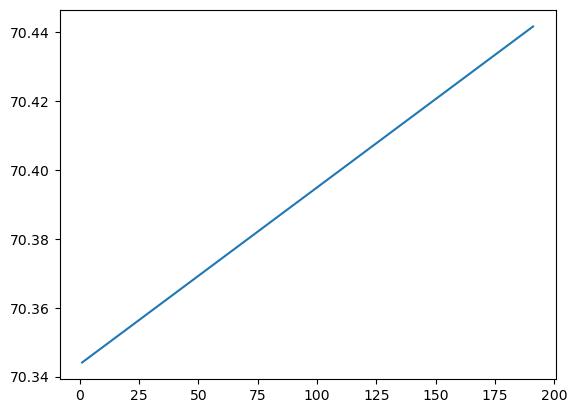

In [89]:
plt.plot(arr_syn_rank,pred_avg )
plt.show()

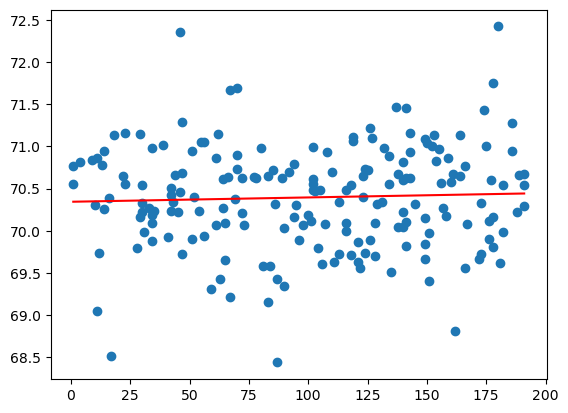

In [90]:
colour="red"
plt.scatter(arr_syn_rank,arr_syn_avg)
plt.plot(arr_syn_rank,pred_avg,colour )
plt.show()

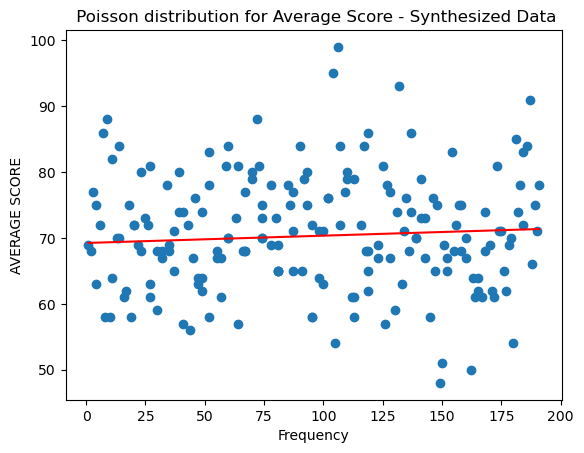

In [91]:
# Scatter Plot of poisson distribution for Average Score
fig, ax = plt.subplots(1, 1) 
ax.scatter(x,p)
ax.plot(x,pred_y,colour)
  
# Set title 
ax.set_title(" Poisson distribution for Average Score - Synthesized Data") 
  
# adding labels 
ax.set_xlabel('Frequency') 
ax.set_ylabel('AVERAGE SCORE')
plt.show()
#plt.scatter(x,p)
plt.show()

## SEABORN PAIRPLOTS

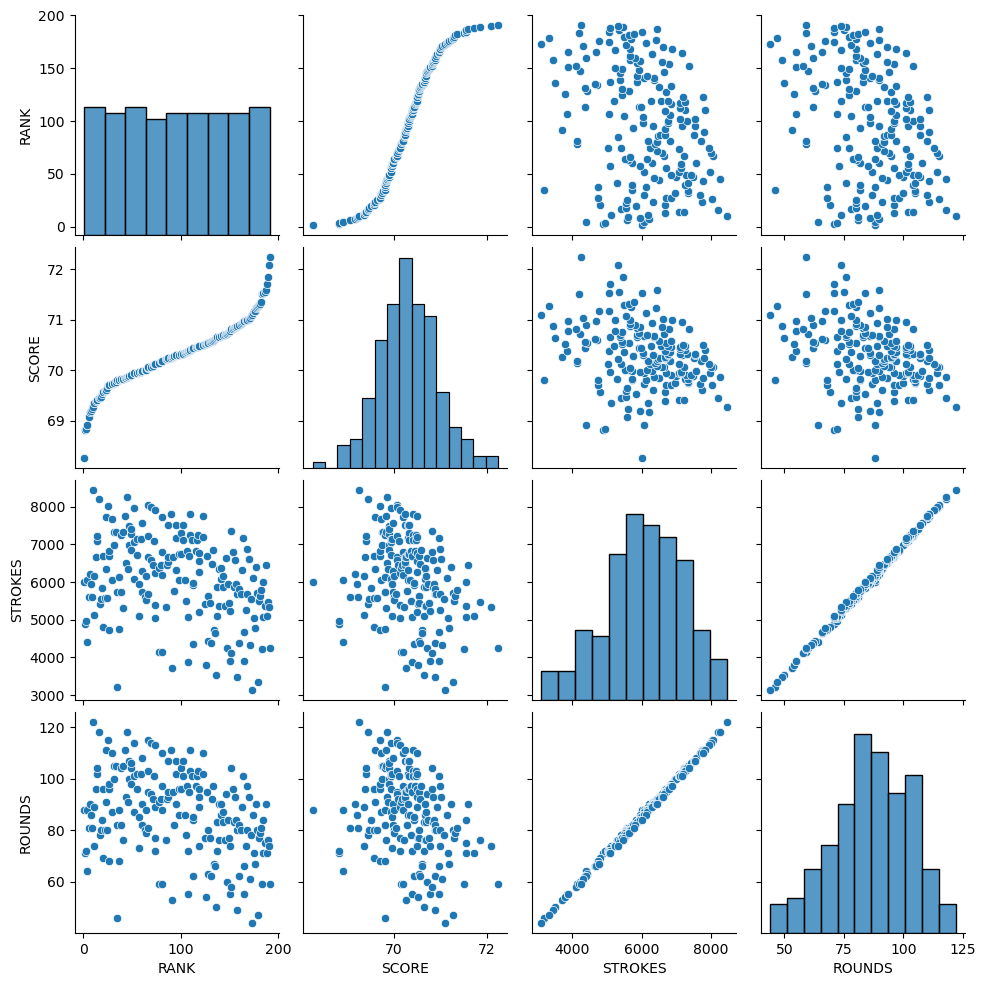

In [92]:
sns.pairplot(data=df)

In [93]:
#correlation = np.corrcoef(x, p)
#correlation

In [94]:
# https://www.pgatour.com/stats/detail/101
df1 = pd.read_csv('pgatour_golfstats_2022-2023_driving.csv')
df1

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE,TOTAL DRIVES
0,1,0,28237,Rory McIlroy,326.3,41771,128
1,2,0,51491,Brandon Matthews,321.3,37915,118
2,3,0,52372,Cameron Champ,318.8,47180,148
3,4,0,52453,Nicolai Hojgaard,317.7,29227,92
4,5,0,57366,Cameron Young,316.5,51902,164
...,...,...,...,...,...,...,...
184,185,-2,30927,Brendon Todd,282.8,54300,192
185,186,-2,40058,Zac Blair,282.4,42920,152
186,187,-2,31202,William McGirt,281.0,25292,90
187,188,-2,34409,David Lingmerth,279.2,45789,164


In [95]:
df1 = df1.drop('MOVEMENT', axis=1)
df1 = df1.drop('PLAYER_ID', axis=1)

In [96]:
df1["TOUR"] = "PGA TOUR"
df1

,RANK,PLAYER,AVG,TOTAL DISTANCE,TOTAL DRIVES,TOUR
0,1,Rory McIlroy,326.3,41771,128,PGA TOUR
1,2,Brandon Matthews,321.3,37915,118,PGA TOUR
2,3,Cameron Champ,318.8,47180,148,PGA TOUR
3,4,Nicolai Hojgaard,317.7,29227,92,PGA TOUR
4,5,Cameron Young,316.5,51902,164,PGA TOUR
...,...,...,...,...,...,...
184,185,Brendon Todd,282.8,54300,192,PGA TOUR
185,186,Zac Blair,282.4,42920,152,PGA TOUR
186,187,William McGirt,281.0,25292,90,PGA TOUR
187,188,David Lingmerth,279.2,45789,164,PGA TOUR


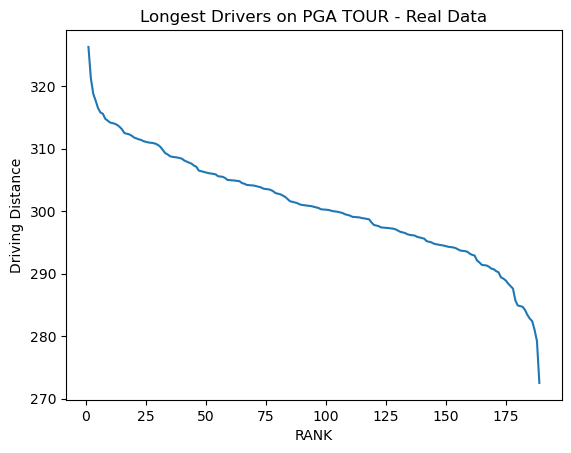

In [97]:
x = df1.RANK
y = df1.AVG
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.plot(x,y) 
  
# Set title 
ax.set_title("Longest Drivers on PGA TOUR - Real Data") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Driving Distance') 

plt.show()

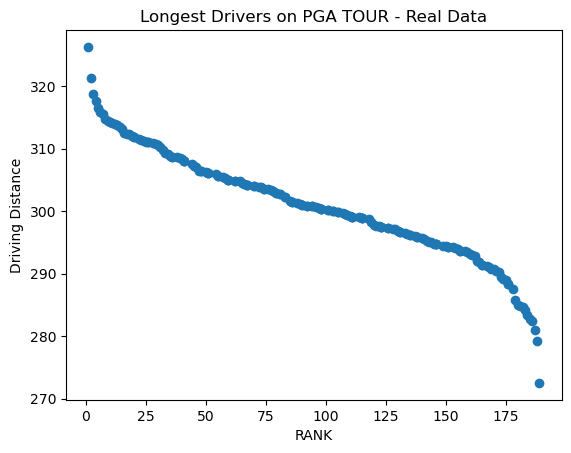

In [98]:
fig, ax = plt.subplots(1, 1) 
ax.scatter(x,y) 
  
# Set title 
ax.set_title("Longest Drivers on PGA TOUR - Real Data") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Driving Distance') 
#plt.scatter(x,y)
plt.show()

In [99]:
correlation = np.corrcoef(x, y)
correlation

array([[ 1.        , -0.97161469],
       [-0.97161469,  1.        ]])

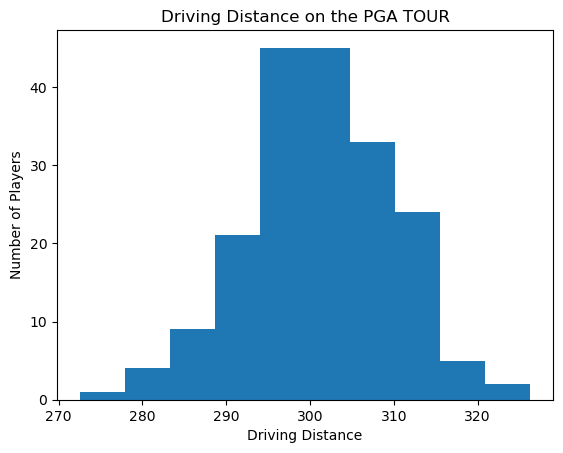

In [100]:
# Plot Driving Distance data from pgatour_golfstats_2022-2023_driving.csv
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(y) 
  
# Set title 
ax.set_title("Driving Distance on the PGA TOUR") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 

plt.show()

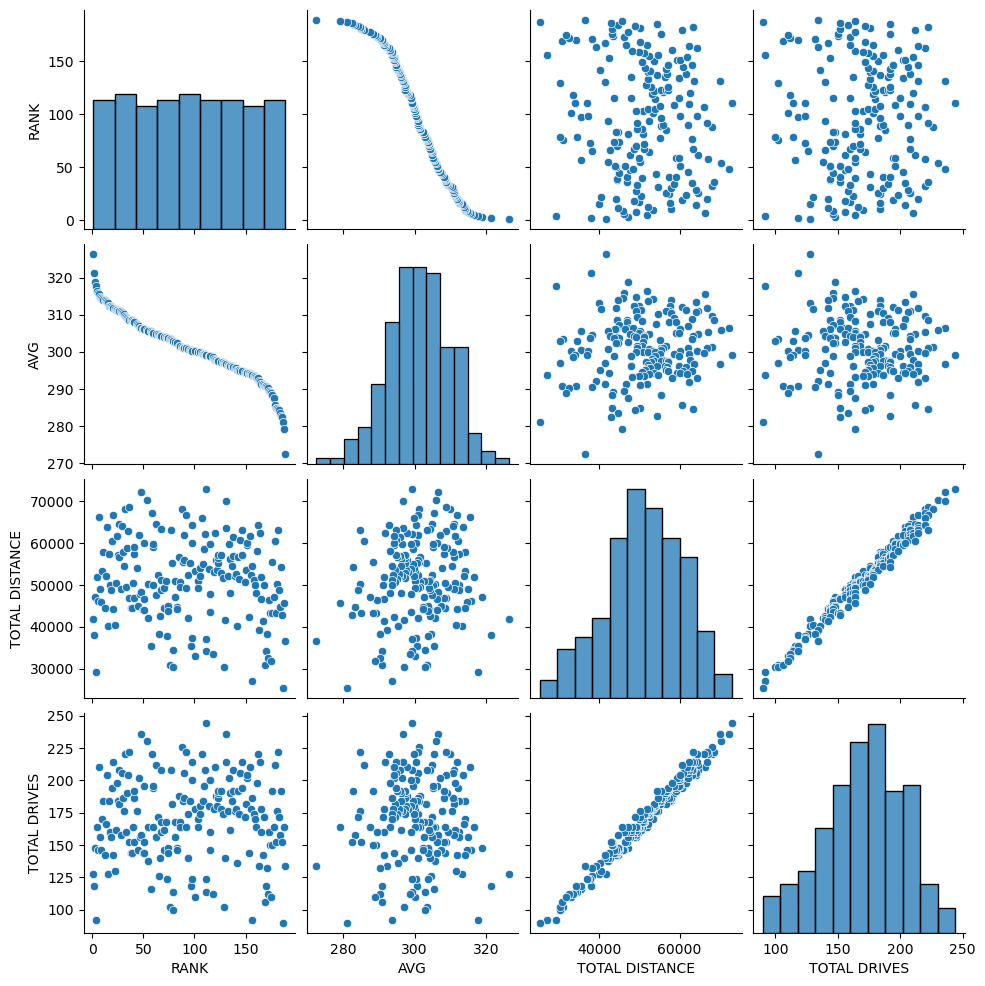

In [101]:
sns.pairplot(data=df1)

In [102]:
df1.AVG

0      326.3
1      321.3
2      318.8
3      317.7
4      316.5
       ...  
184    282.8
185    282.4
186    281.0
187    279.2
188    272.5
Name: AVG, Length: 189, dtype: float64

In [103]:
std = df1.AVG.std()
std

8.66203975287581

In [104]:
mean = df1.AVG.mean()
mean

300.96402116402106

In [105]:
df1.describe()

,RANK,AVG,TOTAL DISTANCE,TOTAL DRIVES
count,189.000000,189.000000,189.000000,189.00000
mean,94.719577,300.964021,51175.285714,170.05291
std,54.711144,8.662040,9840.011169,32.48334
min,1.000000,272.500000,25292.000000,90.00000
25%,48.000000,295.200000,44589.000000,148.00000
50%,94.000000,300.800000,51338.000000,172.00000
75%,142.000000,306.400000,57791.000000,192.00000
max,189.000000,326.300000,72978.000000,244.00000


In [106]:
count = df1.count()
count

RANK              189
PLAYER            189
AVG               189
TOTAL DISTANCE    189
TOTAL DRIVES      189
TOUR              189
dtype: int64

In [107]:
# Synthesize a random normal distribution for Driving Distance
# I choose mu of 300.5 because this is the average drivage distance in pgatour_golfstats_2022-2023_driving.csv
mu, sigma = 300.96, 8.66 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 191)
s

array([307.07234984, 300.12800377, 308.17365619, 304.17713702,
       310.29527818, 294.74137183, 283.33167414, 310.98521415,
       314.21511251, 300.40113022, 288.68470432, 290.37945246,
       297.46915951, 307.42871089, 305.74178441, 307.39474055,
       281.12848495, 306.00678154, 309.99810159, 306.73767588,
       316.94602388, 290.54170679, 308.69198382, 315.54435228,
       317.91178421, 291.87001355, 309.60187384, 282.68299282,
       297.53204537, 306.06358966, 315.66559015, 297.15926028,
       296.339378  , 299.67164494, 305.06864602, 297.67482856,
       300.91726728, 285.26391903, 296.20066839, 312.0067602 ,
       291.40167596, 296.27055975, 304.57785943, 296.55726917,
       291.45169185, 318.45706308, 293.33154426, 318.78710482,
       312.02884859, 296.9200276 , 312.27784096, 282.62794251,
       313.96635046, 297.77523735, 303.63353982, 292.50189371,
       312.43948256, 298.22933306, 314.7912702 , 305.33595833,
       314.68057446, 297.41877891, 293.52323638, 297.81

In [108]:
x, counts = np.unique(s, return_counts=True)
x


array([280.60700688, 281.12848495, 282.62794251, 282.64653639,
       282.68299282, 282.87276576, 283.33167414, 283.68972272,
       284.64124052, 284.72584084, 285.26391903, 286.1512957 ,
       286.31848925, 286.80078861, 287.19288674, 287.6355494 ,
       288.58364355, 288.64174701, 288.68470432, 288.74322097,
       288.91892886, 289.81952493, 289.94663155, 290.23772833,
       290.36968168, 290.37945246, 290.45897957, 290.54170679,
       290.61938583, 290.66317359, 290.97841471, 291.23494961,
       291.40167596, 291.45169185, 291.87001355, 291.93489925,
       292.50189371, 292.86857777, 292.88588703, 292.88694634,
       293.19194616, 293.33154426, 293.52323638, 293.9273974 ,
       293.97799005, 294.35382772, 294.74137183, 294.79328815,
       294.9805537 , 295.00561115, 295.14265515, 295.19258129,
       295.31989642, 295.71091595, 295.89573136, 296.20066839,
       296.27055975, 296.339378  , 296.45556332, 296.55726917,
       296.59949365, 296.83205416, 296.9200276 , 297.08

In [109]:
counts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

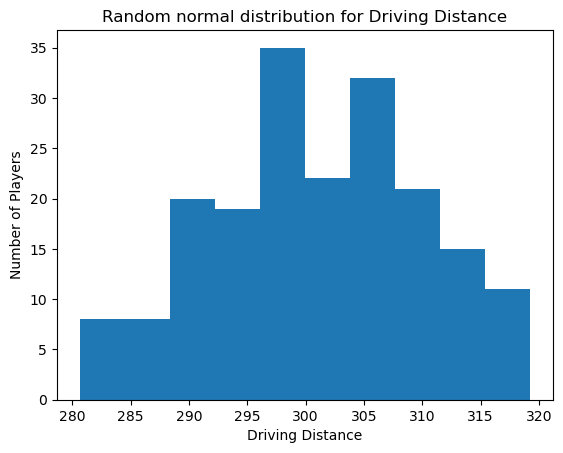

In [110]:
# Plot random normal distribution for Driving Distance
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(s) 
  
# Set title 
ax.set_title("Random normal distribution for Driving Distance") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 

plt.show()

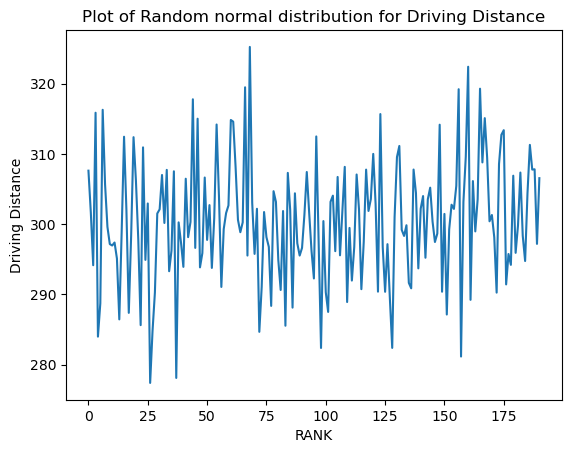

In [111]:
#plt.plot(np.random.default_rng().normal(mu, sigma, 189))
fig, ax = plt.subplots(1, 1) 
ax.plot(np.random.default_rng().normal(mu, sigma, 191)) 
  
# Set title 
ax.set_title("Plot of Random normal distribution for Driving Distance") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Driving Distance') 
plt.show()

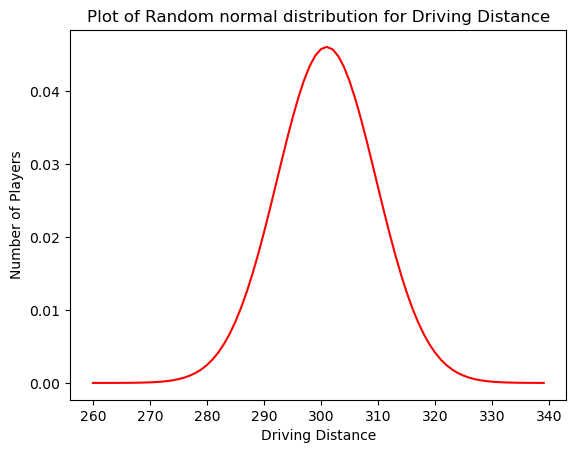

In [112]:
colour="red"
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(260, 340, 1)
# Mean = 0, SD = 2.
#plt.plot(x_axis, norm.pdf(x_axis,300.96402116402106,8.66203975287581),colour)
fig, ax = plt.subplots(1, 1) 
ax.plot(x_axis, norm.pdf(x_axis,300.96402116402106,8.66203975287581),colour)
  
# Set title 
ax.set_title("Plot of Random normal distribution for Driving Distance") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 
plt.show()

In [113]:
#def my_gauss(x, sigma=sigma, h=h, mean=mean):
#    from math import exp, pow
#    variance = pow(sigma, 2)
#    return h * exp(-pow(x-mean, 2)/(2*variance))

In [114]:
#h = 40
#mean = mean
#variance = pow(sigma, 2)
#sigma = math.sqrt(variance)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1)
#plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
#plt.show()
#my_gauss

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Count'>

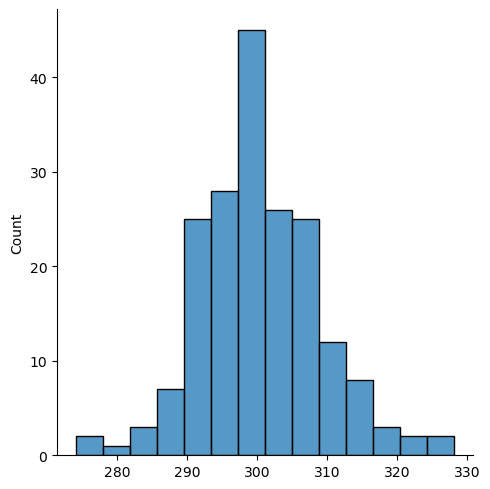

In [115]:
value = np.random.normal(loc=300.96402116402106,scale=8.66203975287581,size=189)
sns.displot(value)
sns.lineplot(value)

In [116]:
# Synthesize a poisson distribution for Driving Distance
mu=300.96402116402106
p = np.random.default_rng().poisson(mu, len(df1.index))
p

array([292, 319, 293, 280, 325, 320, 280, 309, 294, 301, 279, 307, 300,
       320, 309, 293, 294, 271, 301, 269, 276, 290, 272, 298, 273, 308,
       294, 295, 290, 291, 274, 332, 287, 305, 311, 299, 316, 329, 341,
       339, 294, 276, 284, 308, 273, 280, 293, 280, 291, 274, 284, 297,
       300, 286, 298, 289, 269, 273, 270, 308, 294, 295, 317, 279, 335,
       336, 317, 312, 297, 328, 320, 278, 312, 296, 289, 327, 308, 286,
       318, 314, 301, 300, 286, 293, 298, 304, 307, 318, 277, 308, 299,
       289, 312, 308, 276, 301, 323, 285, 319, 287, 308, 322, 317, 286,
       297, 296, 300, 290, 288, 311, 292, 319, 315, 265, 292, 305, 312,
       330, 298, 322, 290, 289, 280, 274, 309, 299, 318, 316, 277, 338,
       265, 303, 325, 293, 297, 310, 299, 300, 314, 298, 303, 308, 311,
       334, 287, 252, 306, 283, 325, 267, 333, 293, 330, 299, 318, 302,
       325, 304, 314, 306, 281, 291, 304, 286, 297, 330, 274, 298, 291,
       305, 291, 323, 322, 281, 287, 292, 300, 326, 293, 305, 28

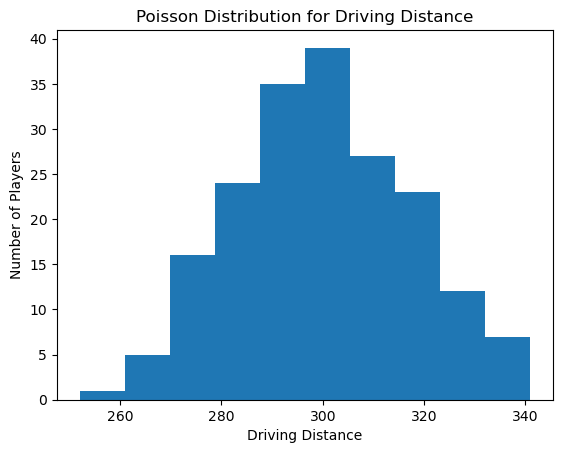

In [117]:
# Plot poisson distribution for Driving Distance

# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(p) 
  
# Set title 
ax.set_title("Poisson Distribution for Driving Distance") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 

plt.show()

### Add synthesised Driving Distance data to DataFrame

In [118]:
my_dict = {'RANK' : syn_rank, 'AVERAGE' : sort_avg, 'STROKES' : norm_strokes, 'ROUNDS' : norm_rounds, 'DRIVING' : s}
syn_df = pd.DataFrame(my_dict)
syn_df

,RANK,AVERAGE,STROKES,ROUNDS,DRIVING
0,1,68.435301,4318.874125,87.830927,307.072350
1,1,68.510841,6532.822802,78.711911,300.128004
2,4,68.805536,6036.213215,85.657645,308.173656
3,9,69.048141,6493.615842,90.251048,304.177137
4,10,69.157927,6631.745065,103.844377,310.295278
...,...,...,...,...,...
186,188,71.671521,5144.351026,76.151875,298.383908
187,189,71.695292,6523.486120,69.539751,303.792037
188,191,71.758873,8421.644387,77.229107,313.909322
189,191,72.363286,5601.093685,83.334030,302.254941


In [119]:
dataframe1 = pd.read_excel('dpworldtour_2022-2023_scoringaverage.xlsx')
dataframe1

,RANK,COUNTRY,PLAYER,TOTAL ROUNDS,AVG,TOUR
0,1,NaN,"MCILROY, Rory",30,68.80,DP World Tour
1,2,NaN,"BJÖRK, Alexander",88,69.53,DP World Tour
2,3,NaN,"HØJGAARD, Nicolai",61,69.59,DP World Tour
3,4,NaN,"KIMSEY, Nathan",76,69.74,DP World Tour
4,5,NaN,"OLESEN, Thorbjørn",84,69.80,DP World Tour
...,...,...,...,...,...,...
169,170,NaN,"MURPHY, John",51,73.86,DP World Tour
170,171,NaN,"LI, Haotong",43,74.07,DP World Tour
171,172,NaN,"WINDRED, Blake",34,74.18,DP World Tour
172,173,NaN,"CHENGYAO, Ma",40,74.83,DP World Tour


In [120]:
dataframe1 = dataframe1.drop('COUNTRY',axis=1)

In [121]:
dataframe1

,RANK,PLAYER,TOTAL ROUNDS,AVG,TOUR
0,1,"MCILROY, Rory",30,68.80,DP World Tour
1,2,"BJÖRK, Alexander",88,69.53,DP World Tour
2,3,"HØJGAARD, Nicolai",61,69.59,DP World Tour
3,4,"KIMSEY, Nathan",76,69.74,DP World Tour
4,5,"OLESEN, Thorbjørn",84,69.80,DP World Tour
...,...,...,...,...,...
169,170,"MURPHY, John",51,73.86,DP World Tour
170,171,"LI, Haotong",43,74.07,DP World Tour
171,172,"WINDRED, Blake",34,74.18,DP World Tour
172,173,"CHENGYAO, Ma",40,74.83,DP World Tour


In [122]:
print(dataframe1.columns)

Index(['RANK', 'PLAYER', 'TOTAL ROUNDS', 'AVG', 'TOUR'], dtype='object')


In [123]:
#dataframe1.columns = ['RANK', 'Unnamed: 1', 'PLAYER', 'ROUNDS', 'AVG', 'TOUR']
dataframe1.columns

Index(['RANK', 'PLAYER', 'TOTAL ROUNDS', 'AVG', 'TOUR'], dtype='object')

In [124]:
dataframe1.iloc[0]

RANK                        1
PLAYER          MCILROY, Rory
TOTAL ROUNDS               30
AVG                      68.8
TOUR            DP World Tour
Name: 0, dtype: object

In [125]:
concat = pd.concat([df, dataframe1], ignore_index=True)
concat

,RANK,PLAYER,SCORE,STROKES,ROUNDS,TOUR,TOTAL ROUNDS,AVG
0,1,Scottie Scheffler,68.26,6007.0,88.0,PGA TOUR,NaN,NaN
1,2,Jon Rahm,68.82,4886.0,71.0,PGA TOUR,NaN,NaN
2,3,Patrick Cantlay,68.83,4956.0,72.0,PGA TOUR,NaN,NaN
3,4,Viktor Hovland,68.92,6065.0,88.0,PGA TOUR,NaN,NaN
4,4,Rory McIlroy,68.92,4411.0,64.0,PGA TOUR,NaN,NaN
...,...,...,...,...,...,...,...,...
360,170,"MURPHY, John",NaN,NaN,NaN,DP World Tour,51.0,73.86
361,171,"LI, Haotong",NaN,NaN,NaN,DP World Tour,43.0,74.07
362,172,"WINDRED, Blake",NaN,NaN,NaN,DP World Tour,34.0,74.18
363,173,"CHENGYAO, Ma",NaN,NaN,NaN,DP World Tour,40.0,74.83


In [126]:
pgatour = concat[concat['TOUR']=='PGA TOUR']
dpworldtour = concat[concat['TOUR']=='DP World Tour']

In [127]:
pgatour.mean()

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_6112\2823721802.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pgatour.mean()


RANK              95.596859
SCORE             70.303246
STROKES         6058.560209
ROUNDS            86.225131
TOTAL ROUNDS            NaN
AVG                     NaN
dtype: float64

In [128]:
dpworldtour.mean()

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_6112\1499420383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dpworldtour.mean()


RANK            87.500000
SCORE                 NaN
STROKES               NaN
ROUNDS                NaN
TOTAL ROUNDS    68.563218
AVG             71.273161
dtype: float64

In [129]:
mean_groupby = concat.groupby(['TOUR']).AVG.mean()
mean_groupby

TOUR
DP World Tour    71.273161
PGA TOUR               NaN
Name: AVG, dtype: float64

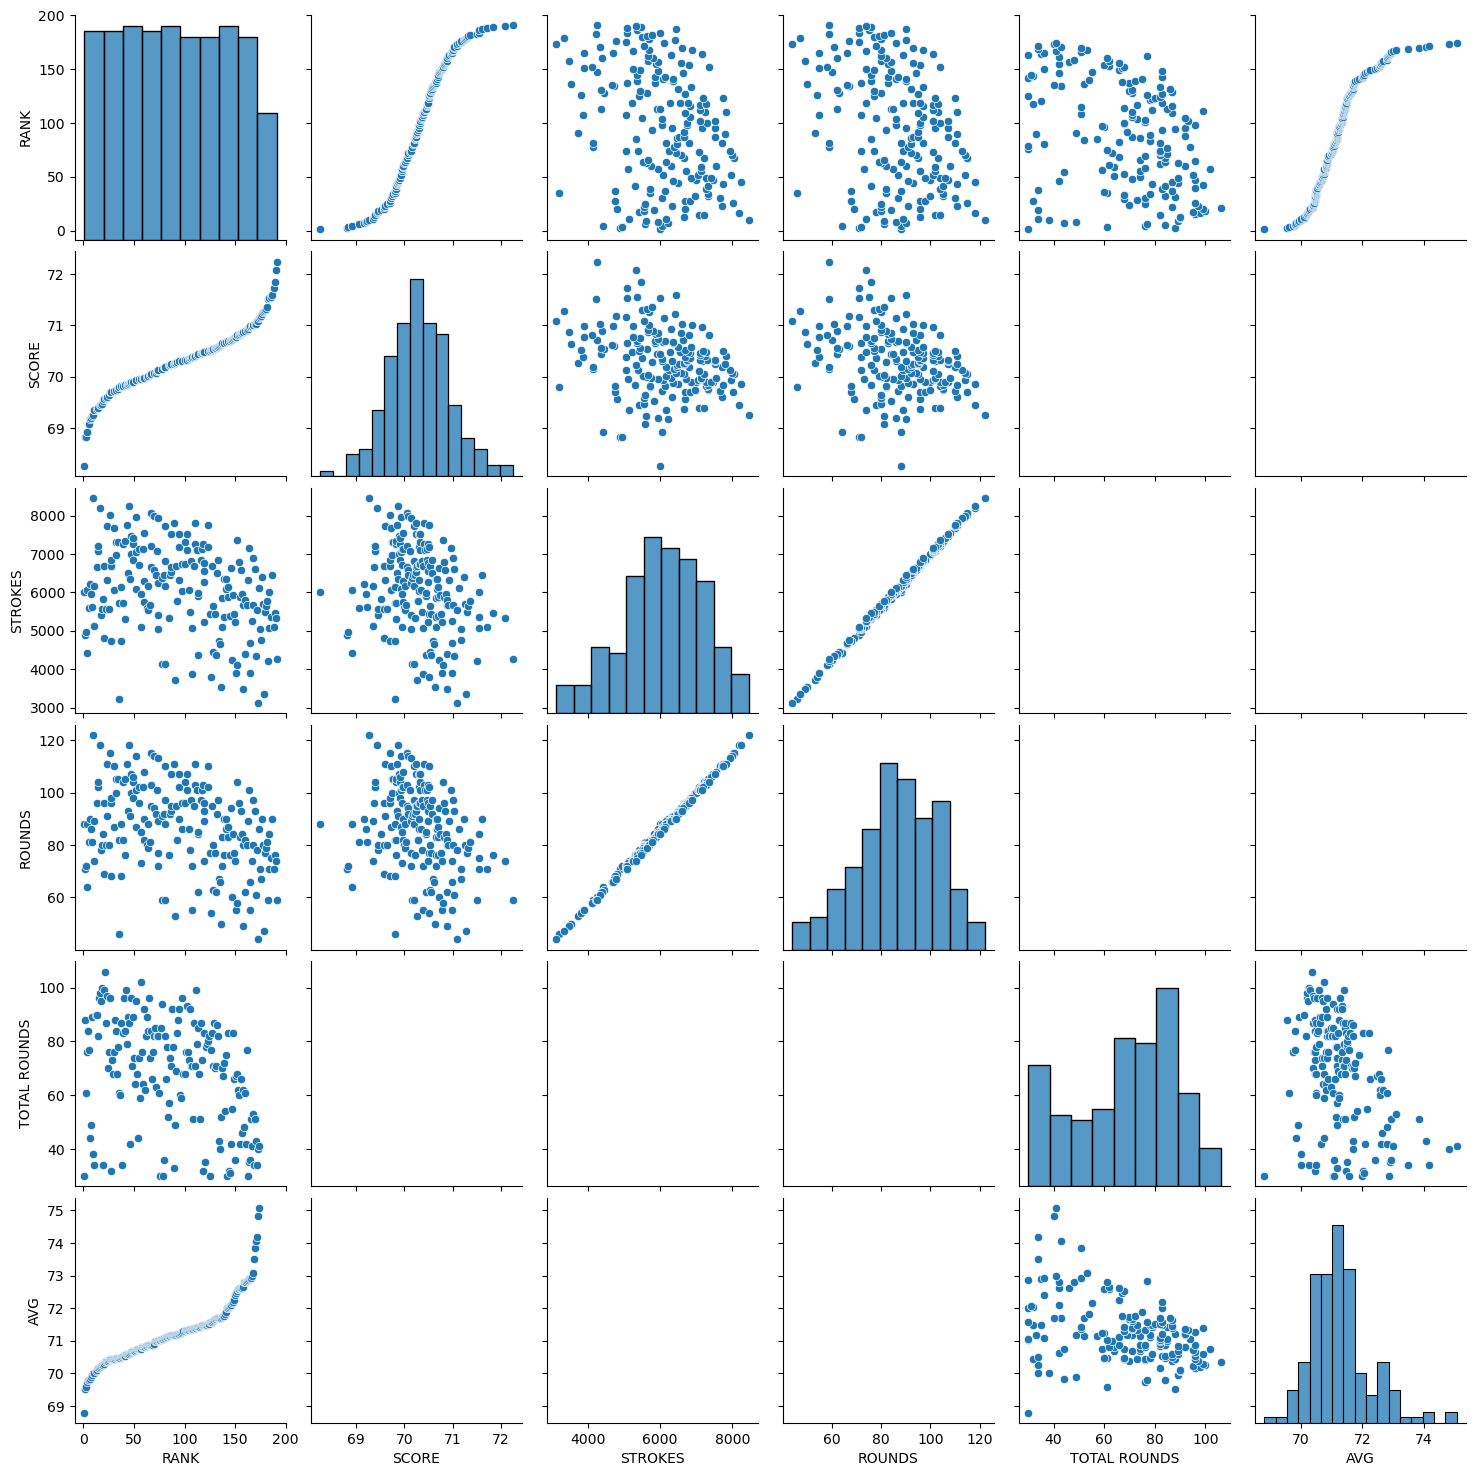

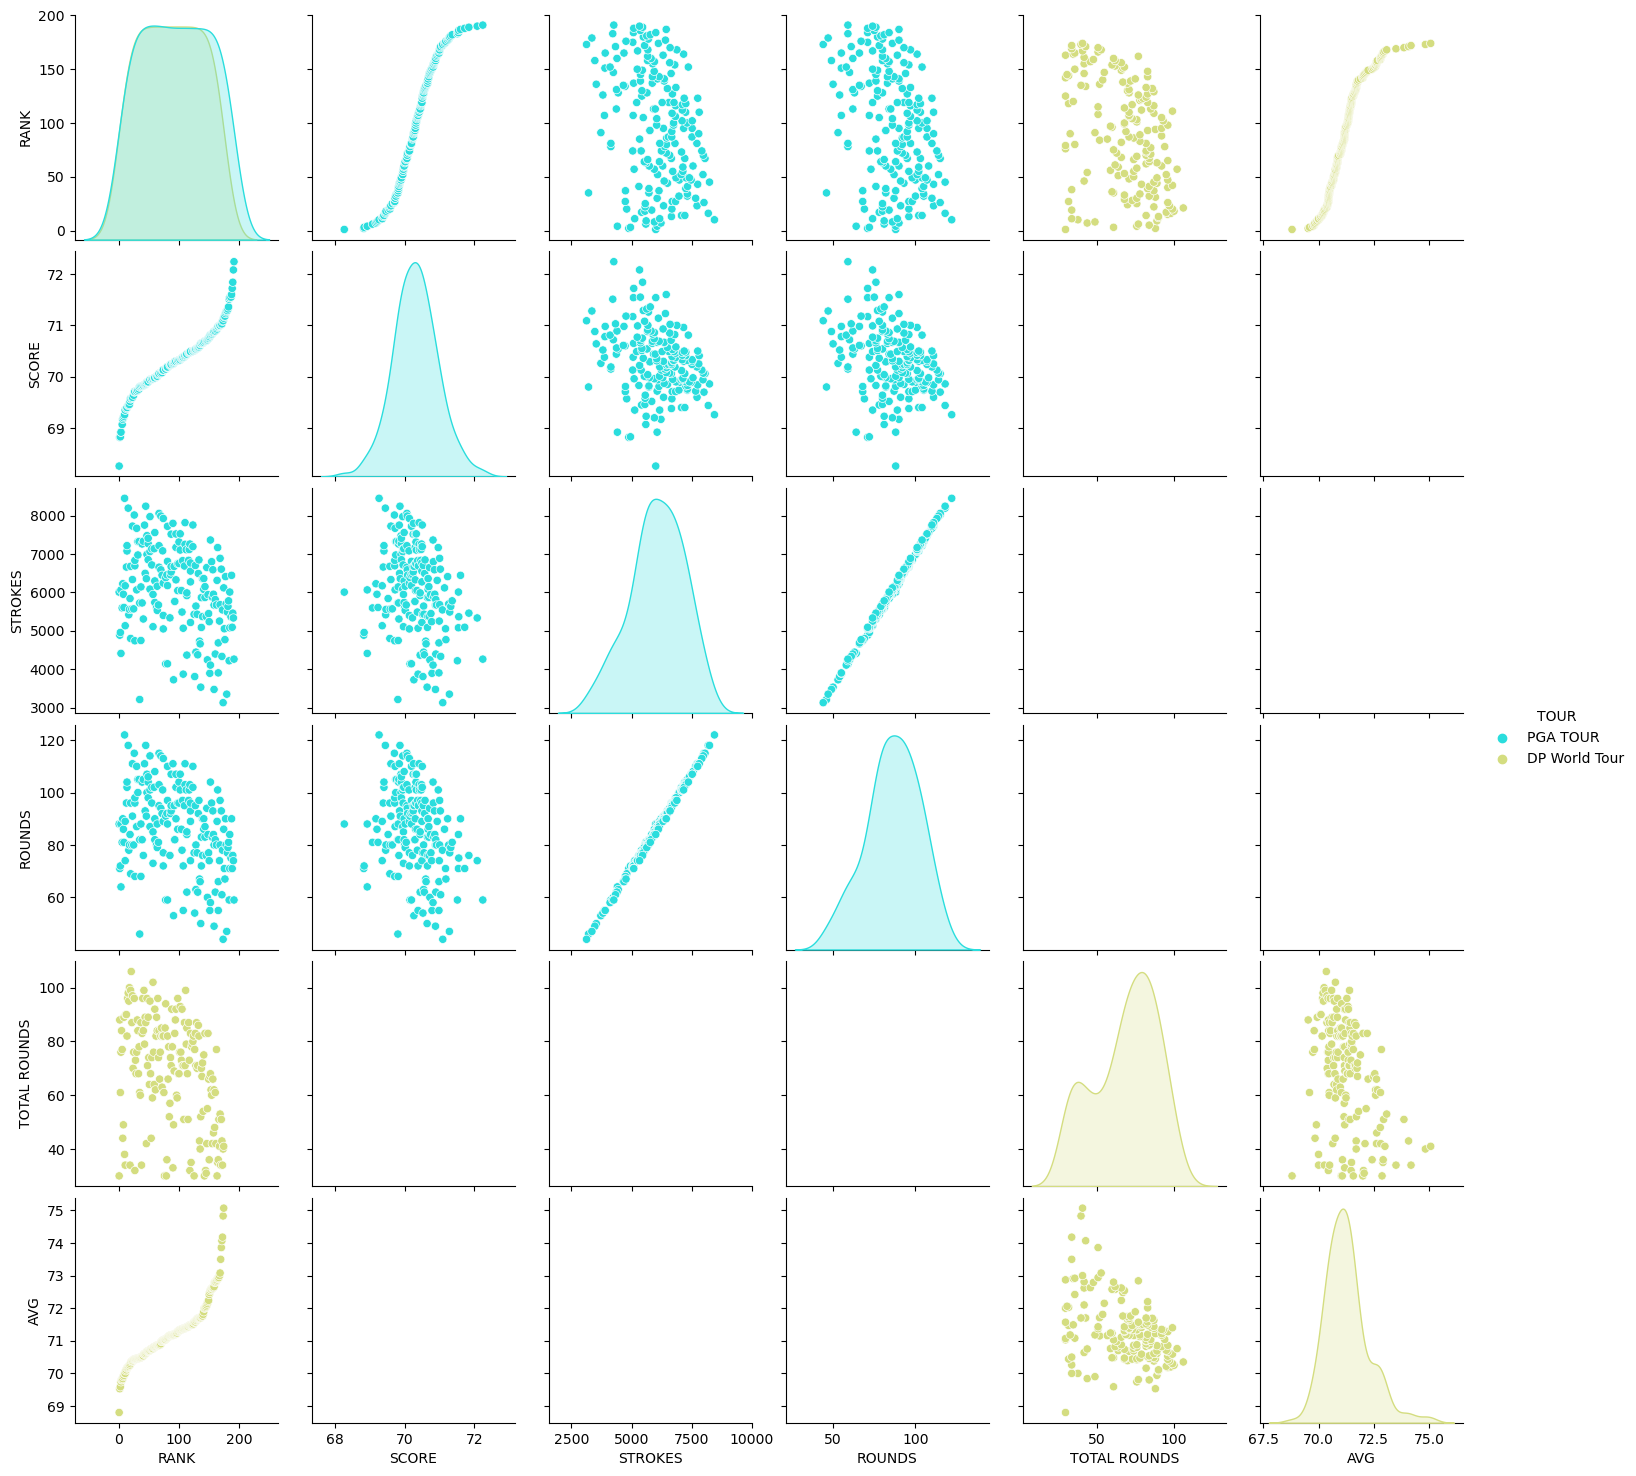

In [130]:
sns.pairplot(data = concat)
sns.pairplot(concat, hue="TOUR", palette="rainbow")

## TIME SERIES

In [131]:
dataframe2 = pd.read_excel('Shane Lowry_2022-2-23_Results_time-series.xlsx')
dataframe2

,DATE,TOURNAMENT,POS,R1,R2,R3,R4,R5,TOTAL,TO PAR,RANK,PTS,Unnamed: 12,RANK.1,PTS.1,WINNINGS,Unnamed: 16
0,10.23.2022,THE CJ CUP in South Carolina,T23,68,67,71,72,-,278.0,-6,99,34.833,NaN,-,-,"$88,305.00",NaN
1,12.4.2022,Hero World Challenge*,18,74,77,71,71,-,293.0,5,-,-,NaN,-,-,"$102,000.00",-
2,2.12.2023,WM Phoenix Open,CUT,75,76,-,-,-,151.0,9,180,-,NaN,-,-,-,NaN
3,2.19.2023,The Genesis Invitational,T14,69,69,71,68,-,277.0,-7,131,58.25,NaN,-,-,"$355,000.00",NaN
4,2.26.2023,The Honda Classic,T5,68,68,65,70,-,271.0,-9,89,93,NaN,-,-,"$288,120.00",NaN
5,3.5.2023,Arnold Palmer Invitational presented by Master...,67,72,70,80,71,-,293.0,5,97,4.08,NaN,-,-,"$42,600.00",NaN
6,3.12.2023,THE PLAYERS Championship,T35,77,69,68,70,-,284.0,-4,96,19.267,NaN,-,-,"$114,166.67",NaN
7,3.26.2023,World Golf Championships-Dell Technologies Mat...,T31,-,-,-,-,-,0.0,NaN,97,17.729,NaN,-,-,"$113,761.91",NaN
8,4.9.2023,Masters Tournament,T16,68,72,73,73,-,286.0,-2,88,52.886,NaN,-,-,"$261,000.00",-
9,4.16.2023,RBC Heritage,T67,70,69,74,72,-,285.0,1,90,3.3,NaN,-,-,"$41,600.00",NaN


In [132]:
dataframe2['datetime'] = pd.to_datetime(dataframe2['DATE'])
dataframe2

,DATE,TOURNAMENT,POS,R1,R2,R3,R4,R5,TOTAL,TO PAR,RANK,PTS,Unnamed: 12,RANK.1,PTS.1,WINNINGS,Unnamed: 16,datetime
0,10.23.2022,THE CJ CUP in South Carolina,T23,68,67,71,72,-,278.0,-6,99,34.833,NaN,-,-,"$88,305.00",NaN,2022-10-23
1,12.4.2022,Hero World Challenge*,18,74,77,71,71,-,293.0,5,-,-,NaN,-,-,"$102,000.00",-,2022-12-04
2,2.12.2023,WM Phoenix Open,CUT,75,76,-,-,-,151.0,9,180,-,NaN,-,-,-,NaN,2023-02-12
3,2.19.2023,The Genesis Invitational,T14,69,69,71,68,-,277.0,-7,131,58.25,NaN,-,-,"$355,000.00",NaN,2023-02-19
4,2.26.2023,The Honda Classic,T5,68,68,65,70,-,271.0,-9,89,93,NaN,-,-,"$288,120.00",NaN,2023-02-26
5,3.5.2023,Arnold Palmer Invitational presented by Master...,67,72,70,80,71,-,293.0,5,97,4.08,NaN,-,-,"$42,600.00",NaN,2023-03-05
6,3.12.2023,THE PLAYERS Championship,T35,77,69,68,70,-,284.0,-4,96,19.267,NaN,-,-,"$114,166.67",NaN,2023-03-12
7,3.26.2023,World Golf Championships-Dell Technologies Mat...,T31,-,-,-,-,-,0.0,NaN,97,17.729,NaN,-,-,"$113,761.91",NaN,2023-03-26
8,4.9.2023,Masters Tournament,T16,68,72,73,73,-,286.0,-2,88,52.886,NaN,-,-,"$261,000.00",-,2023-04-09
9,4.16.2023,RBC Heritage,T67,70,69,74,72,-,285.0,1,90,3.3,NaN,-,-,"$41,600.00",NaN,2023-04-16


In [133]:
dataframe2['datetime']

0    2022-10-23
1    2022-12-04
2    2023-02-12
3    2023-02-19
4    2023-02-26
5    2023-03-05
6    2023-03-12
7    2023-03-26
8    2023-04-09
9    2023-04-16
10   2023-05-07
11   2023-05-21
12   2023-06-04
13   2023-06-11
14   2023-06-18
15   2023-06-25
16   2023-07-16
17   2023-07-23
18   2023-08-06
19   2023-10-01
Name: datetime, dtype: datetime64[ns]

<AxesSubplot:xlabel='datetime', ylabel='WINNINGS'>

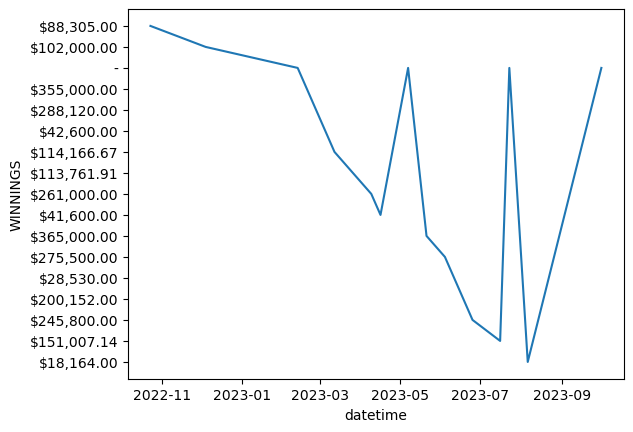

In [134]:
import seaborn as sns
sns.lineplot(data=dataframe2, x="datetime", y="WINNINGS")

In [135]:
dti = pd.date_range("2022-10-23", periods=52, freq="W")
len(dti)
dti

DatetimeIndex(['2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13',
               '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11',
               '2022-12-18', '2022-12-25', '2023-01-01', '2023-01-08',
               '2023-01-15', '2023-01-22', '2023-01-29', '2023-02-05',
               '2023-02-12', '2023-02-19', '2023-02-26', '2023-03-05',
               '2023-03-12', '2023-03-19', '2023-03-26', '2023-04-02',
               '2023-04-09', '2023-04-16', '2023-04-23', '2023-04-30',
               '2023-05-07', '2023-05-14', '2023-05-21', '2023-05-28',
               '2023-06-04', '2023-06-11', '2023-06-18', '2023-06-25',
               '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23',
               '2023-07-30', '2023-08-06', '2023-08-13', '2023-08-20',
               '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
               '2023-09-24', '2023-10-01', '2023-10-08', '2023-10-15'],
              dtype='datetime64[ns]', freq='W-SUN')

In [136]:
winnings = dataframe2['WINNINGS']
winnings

0      $88,305.00
1     $102,000.00
2               -
3     $355,000.00
4     $288,120.00
5      $42,600.00
6     $114,166.67
7     $113,761.91
8     $261,000.00
9      $41,600.00
10              -
11    $365,000.00
12    $275,500.00
13     $28,530.00
14    $200,152.00
15    $245,800.00
16    $151,007.14
17              -
18     $18,164.00
19              -
Name: WINNINGS, dtype: object

In [137]:
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\$':''}, regex = True)
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\,':''}, regex = True)
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\-':'0'}, regex = True)
winnings = dataframe2['WINNINGS']
winnings

0      88305.00
1     102000.00
2             0
3     355000.00
4     288120.00
5      42600.00
6     114166.67
7     113761.91
8     261000.00
9      41600.00
10            0
11    365000.00
12    275500.00
13     28530.00
14    200152.00
15    245800.00
16    151007.14
17            0
18     18164.00
19            0
Name: WINNINGS, dtype: object

In [138]:
dataframe2['WINNINGS'] = pd.to_numeric(dataframe2['WINNINGS'])
dataframe2['WINNINGS']

0      88305.00
1     102000.00
2          0.00
3     355000.00
4     288120.00
5      42600.00
6     114166.67
7     113761.91
8     261000.00
9      41600.00
10         0.00
11    365000.00
12    275500.00
13     28530.00
14    200152.00
15    245800.00
16    151007.14
17         0.00
18     18164.00
19         0.00
Name: WINNINGS, dtype: float64

<AxesSubplot:xlabel='datetime', ylabel='WINNINGS'>

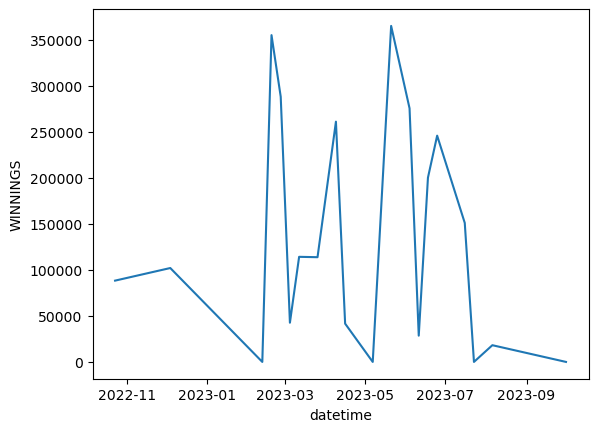

In [139]:
sns.lineplot(data=dataframe2, x="datetime", y="WINNINGS")

In [140]:
#sns.pairplot(data=dataframe2)

In [141]:
mean = dataframe2.WINNINGS.mean()
mean

134535.336

In [142]:
sigma = dataframe2.WINNINGS.std()
sigma

124907.89379401015

In [143]:
rng = np.random.default_rng() 
d = rng.poisson(mean, len(dti))
df = pd.DataFrame(data=d, index = dti)
df.head()

,0
2022-10-23,134938
2022-10-30,133884
2022-11-06,135248
2022-11-13,134819
2022-11-20,134562


In [144]:
df.columns =['WINNINGS']
df.head()

,WINNINGS
2022-10-23,134938
2022-10-30,133884
2022-11-06,135248
2022-11-13,134819
2022-11-20,134562


<AxesSubplot:ylabel='WINNINGS'>

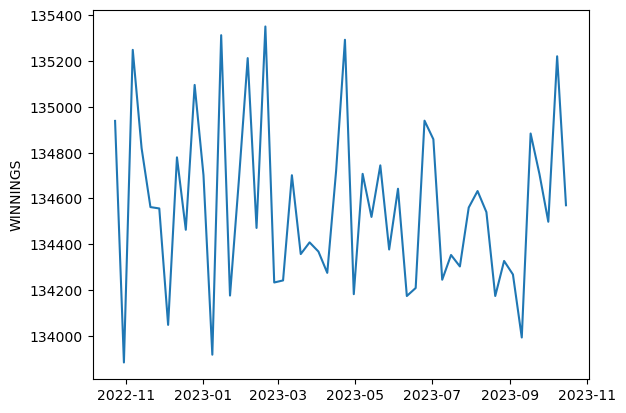

In [145]:
sns.lineplot(data=df, x=df.index, y="WINNINGS")

<AxesSubplot:>

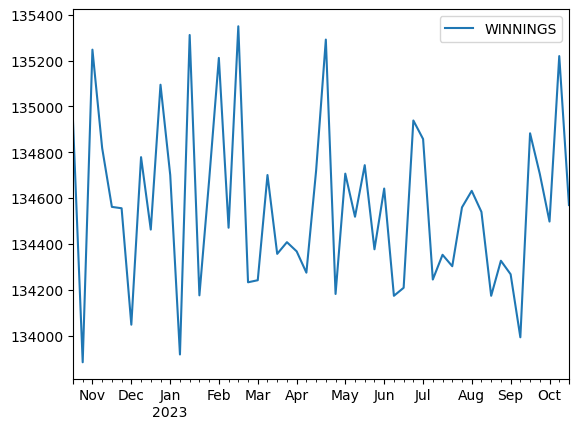

In [146]:
df.plot(y="WINNINGS")

In [147]:
d = rng.normal(mean,sigma,len(dti))
df = pd.DataFrame(data=d, index = dti)
df.head()

,0
2022-10-23,11482.012969
2022-10-30,112838.840149
2022-11-06,101931.851114
2022-11-13,105494.591885
2022-11-20,276275.325652


In [148]:
df.columns =['WINNINGS']
df.head()

,WINNINGS
2022-10-23,11482.012969
2022-10-30,112838.840149
2022-11-06,101931.851114
2022-11-13,105494.591885
2022-11-20,276275.325652


<AxesSubplot:>

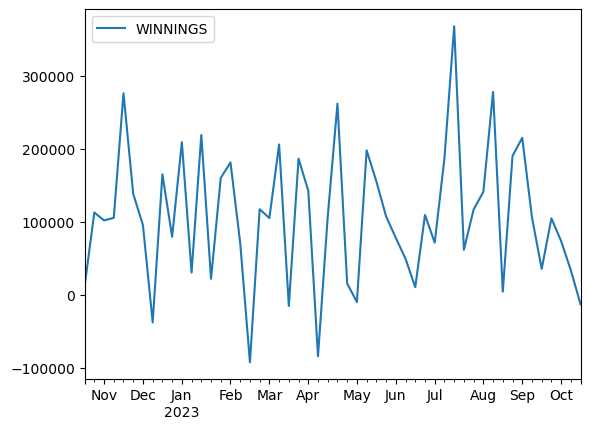

In [149]:
df.plot(y="WINNINGS")

<AxesSubplot:ylabel='WINNINGS'>

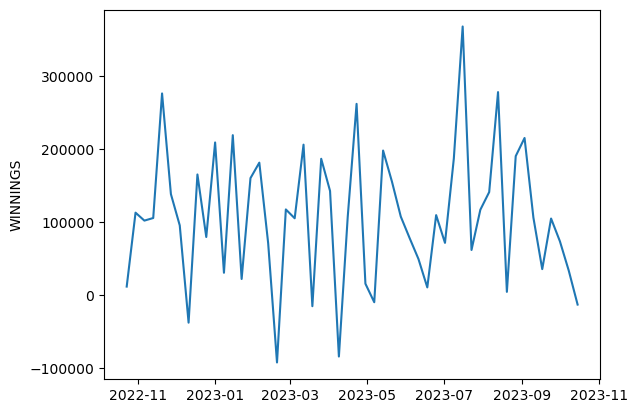

In [150]:
sns.lineplot(data=df, x=df.index, y="WINNINGS")

In [151]:
#sns.pairplot(data=df)

In [152]:
def my_gauss(x, sigma=sigma, h=450000, mean=mean):
    from math import exp, pow
    variance = pow(sigma, 2)
    return h * exp(-pow(x-mean, 2)/(2*variance))

In [153]:
x=df.WINNINGS
yg = [my_gauss(xi) for xi in x]
yg

[276990.9585449934,
 443262.32260162465,
 434928.5685154069,
 438000.51792189287,
 236373.2025793988,
 449797.0694532971,
 428426.37252848543,
 173388.2640737876,
 436650.25150488195,
 408328.9149502368,
 376592.7538017482,
 317955.2603288082,
 357876.1484571758,
 299719.13874610275,
 440617.8398396149,
 419428.4583704368,
 395499.9432256978,
 86196.83623100563,
 445716.5952900719,
 437698.9584052953,
 381957.0049124195,
 218928.93733930355,
 412446.3780153314,
 449066.13608510175,
 96844.56804943846,
 439324.3316859558,
 267371.96172707615,
 285654.9914936546,
 230446.50213818214,
 395564.44788543496,
 443741.3213425271,
 439552.09465245384,
 406166.4460687727,
 356553.47378847236,
 274534.76942297077,
 441026.2427967469,
 396057.8062937361,
 411996.5625539291,
 78373.46207050864,
 379626.31072665006,
 445525.2357341682,
 449386.64634363377,
 232433.17439855373,
 261222.17468165094,
 407277.9172151738,
 365271.6086195397,
 438445.51365560875,
 328411.7161630749,
 437405.6257066057,
 3

(array([ 3.,  0.,  1.,  2.,  4.,  5.,  3.,  3., 12., 19.]),
 array([ 78373.46207051, 115515.82280879, 152658.18354707, 189800.54428535,
        226942.90502362, 264085.2657619 , 301227.62650018, 338369.98723846,
        375512.34797674, 412654.70871502, 449797.0694533 ]),
 <BarContainer object of 10 artists>)

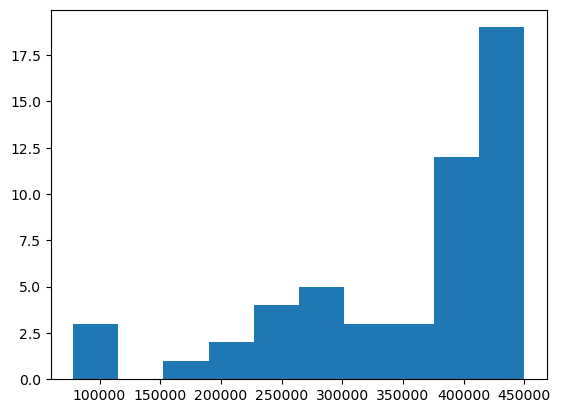

In [154]:
plt.hist(yg)

In [155]:
#f(x)

In [156]:
# Create empty plot.
#fig, ax = plt.subplots(figsize=(12, 4))

# Plot f(x).
#ax.plot(x, f(x));

In [157]:
rng.integers(10,25)

16

In [158]:
rng.integers(100, size=10)

array([27, 41, 10, 26, 80,  9, 26, 49, 38, 77], dtype=int64)

In [159]:
rng.integers(50,100, size=10)

array([95, 99, 84, 97, 97, 79, 62, 95, 55, 73], dtype=int64)

In [160]:
rng.integers(191, size=(191,2))

array([[101,  64],
       [ 13,  31],
       [ 46,  15],
       [102, 155],
       [ 23,  95],
       [121, 133],
       [166, 152],
       [179, 111],
       [172, 186],
       [168, 108],
       [179,  50],
       [  3,  79],
       [130,   6],
       [ 32, 151],
       [  4,  56],
       [ 77, 145],
       [125,   9],
       [ 50,  51],
       [171,  28],
       [ 76,  54],
       [  9, 190],
       [122,  10],
       [171,  15],
       [119, 164],
       [139,  39],
       [ 27, 137],
       [133, 106],
       [ 68, 142],
       [127, 188],
       [  7, 156],
       [ 12,  57],
       [ 56,  84],
       [130, 189],
       [ 80,  71],
       [173, 136],
       [ 11,  40],
       [ 79,  96],
       [ 88,  31],
       [ 60, 117],
       [ 91, 185],
       [ 37, 174],
       [ 11, 140],
       [ 62, 129],
       [  0, 107],
       [ 58, 154],
       [ 94, 120],
       [ 68, 171],
       [141, 165],
       [166,  53],
       [184,  40],
       [ 23,  74],
       [ 44, 109],
       [ 14,

In [161]:
rng.random()

0.6399360941190606

In [162]:
rng.random(5)

array([0.65268141, 0.80330468, 0.93910659, 0.33815787, 0.5901584 ])

In [163]:
rng.random((5,4))

array([[6.15284966e-01, 7.10342232e-01, 3.47500663e-01, 8.75221038e-06],
       [7.22518578e-01, 2.56220579e-01, 1.89145742e-01, 4.86281747e-02],
       [7.12550948e-01, 4.41126655e-01, 2.83618401e-01, 4.17560752e-01],
       [9.47974560e-01, 9.11823229e-01, 5.24502641e-01, 5.26698870e-01],
       [8.03965546e-01, 8.75954661e-01, 1.75983667e-01, 6.72493287e-01]])

As you can see, this is a very uniform distribution. There is the same number in each bin of the histogram. There is almost no  variation at all because the sample size is very large (1,000,000). If we decreased the sample size, the distribution would be less uniform.

In [164]:
rng = np.random.default_rng(seed=43)
x = rng.random()
print(x)

0.6522992627009107


### DUAL PLAYER
A DUAL PLAYER plays on both the PGA TOUR and DP World TOUR : "PGA/DP". For example, Shane Lowry from Clara near Tullamore in Offaly plays on both the PGA TOUR and DP World Tour. He's ranked 113th when it comes to Actual Scorage Average on the PGA TOUR. But I picked a dual player at random using the Random Number Generator and SEED for demonstration purposes. Then I located that row in the Dataframe using the iloc method and changed the entry in the relevant cell from PGA TOUR to PGA/DP.

In [165]:
syn_df["TOUR"] = "PGA TOUR"

In [166]:
rng = np.random.default_rng(seed=44)
DUAL = rng.integers(191)
print(DUAL)

127


In [167]:
syn_df.columns.get_loc('TOUR')

5

In [168]:
syn_df.iloc[127,5] = "PGA/DP"
syn_df.iloc[127,5]

'PGA/DP'

In [169]:
syn_df.iloc[127]

RANK               132
AVERAGE      70.648338
STROKES    6027.255222
ROUNDS       95.629671
DRIVING      306.00607
TOUR            PGA/DP
Name: 127, dtype: object

In [170]:
rng = np.random.default_rng(seed=43)
x = rng.random((2,4))
print(x)

[[0.65229926 0.04377532 0.02002959 0.83921258]
 [0.58714305 0.22470523 0.75179227 0.2636922 ]]


In [171]:
rng = np.random.default_rng(seed=43)
x = rng.integers(50,100,size=(3,3))
print(x)

[[75 82 70]
 [52 78 51]
 [63 91 73]]


# RESULTS

In [172]:
syn_df.AVERAGE = syn_df.AVERAGE.round(2)
syn_df.STROKES = syn_df.STROKES.astype(int)
syn_df.ROUNDS = syn_df.ROUNDS.astype(int)
syn_df.DRIVING = syn_df.DRIVING.astype(int)
syn_df

,RANK,AVERAGE,STROKES,ROUNDS,DRIVING,TOUR
0,1,68.44,4318,87,307,PGA TOUR
1,1,68.51,6532,78,300,PGA TOUR
2,4,68.81,6036,85,308,PGA TOUR
3,9,69.05,6493,90,304,PGA TOUR
4,10,69.16,6631,103,310,PGA TOUR
...,...,...,...,...,...,...
186,188,71.67,5144,76,298,PGA TOUR
187,189,71.70,6523,69,303,PGA TOUR
188,191,71.76,8421,77,313,PGA TOUR
189,191,72.36,5601,83,302,PGA TOUR


# CONCLUSION

# REFERENCES / RESEARCH

Random sampling (numpy.random)
https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random

Set decimal precision of a pandas dataframe column with a datatype of Decimal
https://stackoverflow.com/questions/66969078/set-decimal-precision-of-a-pandas-dataframe-column-with-a-datatype-of-decimal

Populate Pandas Dataframe with normal distribution
https://stackoverflow.com/questions/58996519/populate-pandas-dataframe-with-normal-distribution

How to create a DataFrame of random integers with Pandas?
https://stackoverflow.com/questions/32752292/how-to-create-a-dataframe-of-random-integers-with-pandas

Discrete uniform distribution
https://en.wikipedia.org/wiki/Discrete_uniform_distribution

Normal distribution
https://en.wikipedia.org/wiki/Normal_distribution

How to choose number of bins in numpy.histogram?
https://stackoverflow.com/questions/47607250/how-to-choose-number-of-bins-in-numpy-histogram

Count number of elements in a specific bin
https://stackoverflow.com/questions/55482071/count-number-of-elements-in-a-specific-bin

Exploratory data analysis in Python.
https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

How to add a new column to an existing DataFrame
https://stackoverflow.com/questions/12555323/how-to-add-a-new-column-to-an-existing-dataframe

GOLF STATISTICS
https://datagolf.com/

The synthetic data platform for developers.
https://gretel.ai/

Change the data type of a column or a Pandas Series
https://www.geeksforgeeks.org/change-the-data-type-of-a-column-or-a-pandas-series/

Fitting a Normal distribution to 1D data
https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

SCIPY FIT FUNCTION
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fit.html#scipy.stats.fit

Fitting empirical distribution to theoretical ones with Scipy (Python)?
https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

SK LEARN Linear Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

API for numpy.random.Generator.poisson distribution method
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson

API for pandas.DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame

Pandas Time Series function
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

Remove Dollar Sign from Entire Python Pandas Dataframe
https://stackoverflow.com/questions/43096522/remove-dollar-sign-from-entire-python-pandas-dataframe

Merge, join, concatenate and compare Dataframes
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Create DataFrame with multiple arrays by column
https://stackoverflow.com/questions/65666164/create-dataframe-with-multiple-arrays-by-column

numpy.sort API
https://numpy.org/doc/stable/reference/generated/numpy.sort.html

numpy.histogram API
https://numpy.org/doc/stable/reference/generated/numpy.histogram.html